In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv('exchange_rate.csv')
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


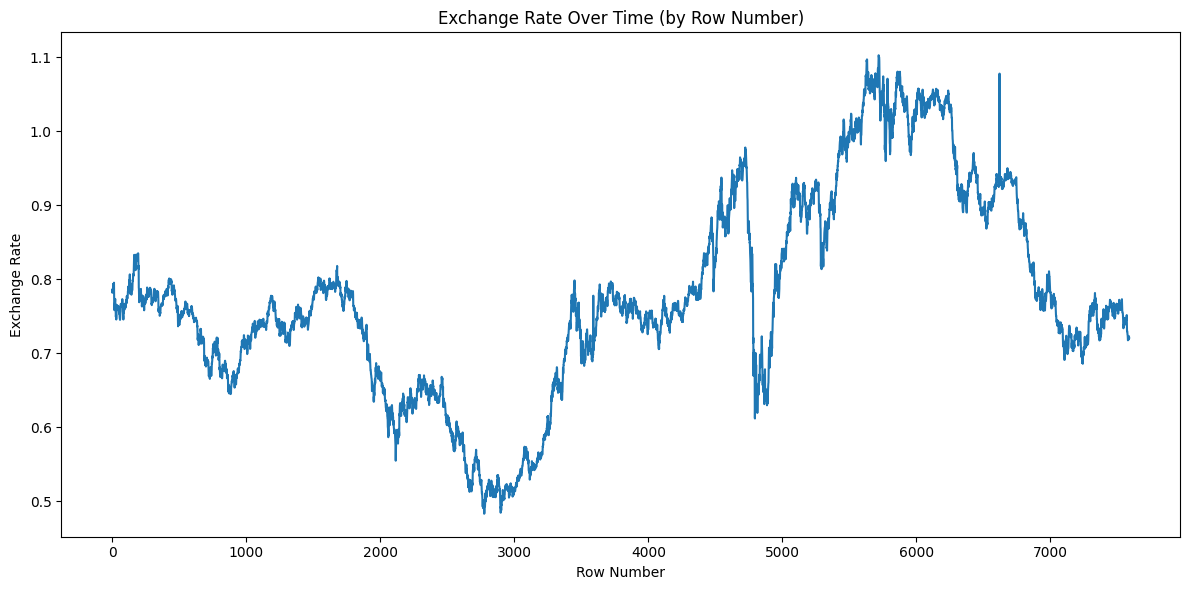

In [8]:
plt.figure(figsize=(12, 6))
# Use the DataFrame index for the x-axis instead of the 'date' column
plt.plot(df.index, df['Ex_rate'])
plt.xlabel('Row Number')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate Over Time (by Row Number)')
plt.tight_layout()
plt.show()

In [9]:
display(df.head())

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [10]:
display(df.head())

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [11]:
df.shape

(7588, 2)

In [12]:
df.dtypes

,0
date,object
Ex_rate,float64


In [13]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


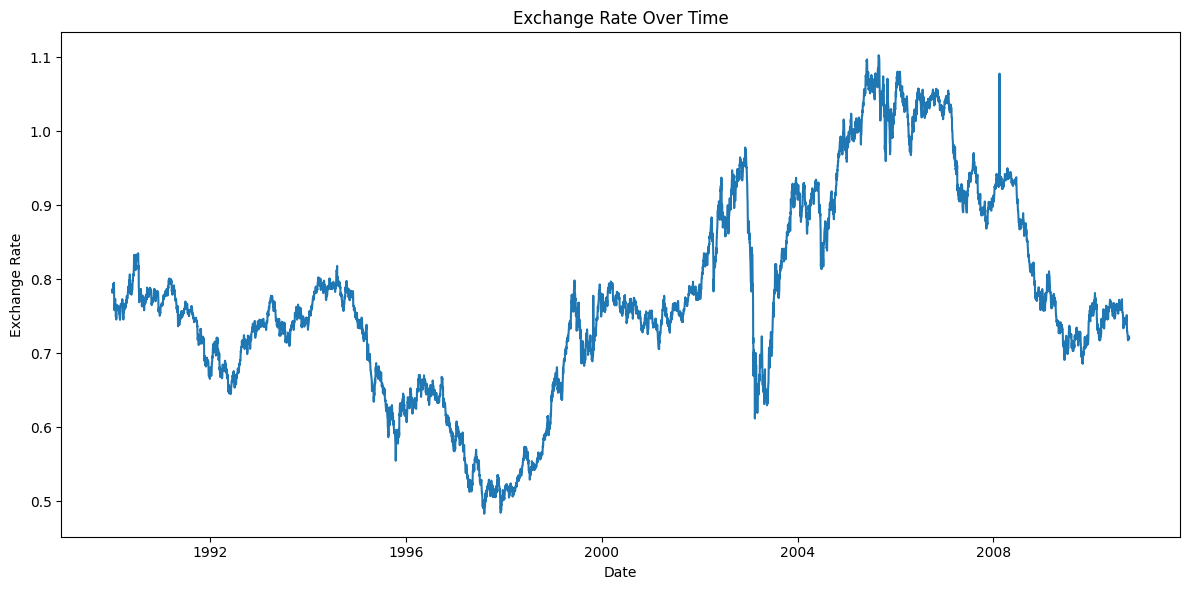

In [14]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
df = df.set_index('date')

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'])
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate Over Time')
plt.tight_layout()
plt.show()

In [15]:
# Check for missing timestamps
missing_dates = pd.date_range(start=df.index.min(), end=df.index.max()).difference(df.index)
if len(missing_dates) > 0:
    print(f"Found {len(missing_dates)} missing dates.")
    # print("Missing dates:", missing_dates) # Uncomment to see the missing dates

# Check for irregular frequency (assuming daily data based on the look of the data)
# Calculate the difference between consecutive timestamps
time_diffs = df.index.to_series().diff()
# Check if all differences are the same (ignoring the first NaN)
if not time_diffs[1:].eq(time_diffs[1]).all():
    print("The time series has irregular frequency.")
else:
    print("The time series has a regular frequency.")


# If irregular frequency or missing data, resample to a daily frequency and interpolate missing values
# You can choose a different frequency like 'D' for daily, 'W' for weekly, 'M' for monthly, etc.
# You can also choose a different interpolation method like 'linear', 'spline', etc.
# Here, we resample to daily frequency and use linear interpolation
df_resampled = df.resample('D').mean().interpolate(method='linear')

print("\nOriginal DataFrame shape:", df.shape)
print("Resampled DataFrame shape:", df_resampled.shape)

# Display the first few rows of the resampled DataFrame
display(df_resampled.head())

# You can now use df_resampled for further analysis or visualization

The time series has a regular frequency.

Original DataFrame shape: (7588, 1)
Resampled DataFrame shape: (7588, 1)


/tmp/ipython-input-3631710950.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not time_diffs[1:].eq(time_diffs[1]).all():


,Ex_rate
date,
1990-01-01,0.7855
1990-01-02,0.7818
1990-01-03,0.7867
1990-01-04,0.7860
1990-01-05,0.7849


Missing values per column:
Ex_rate    0
dtype: int64


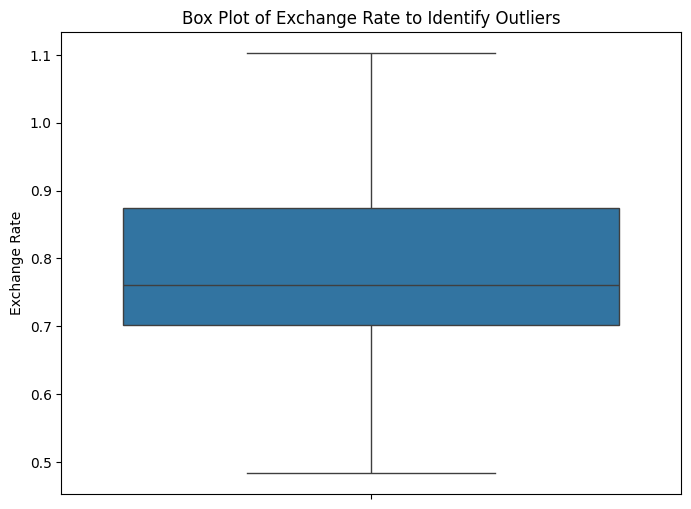

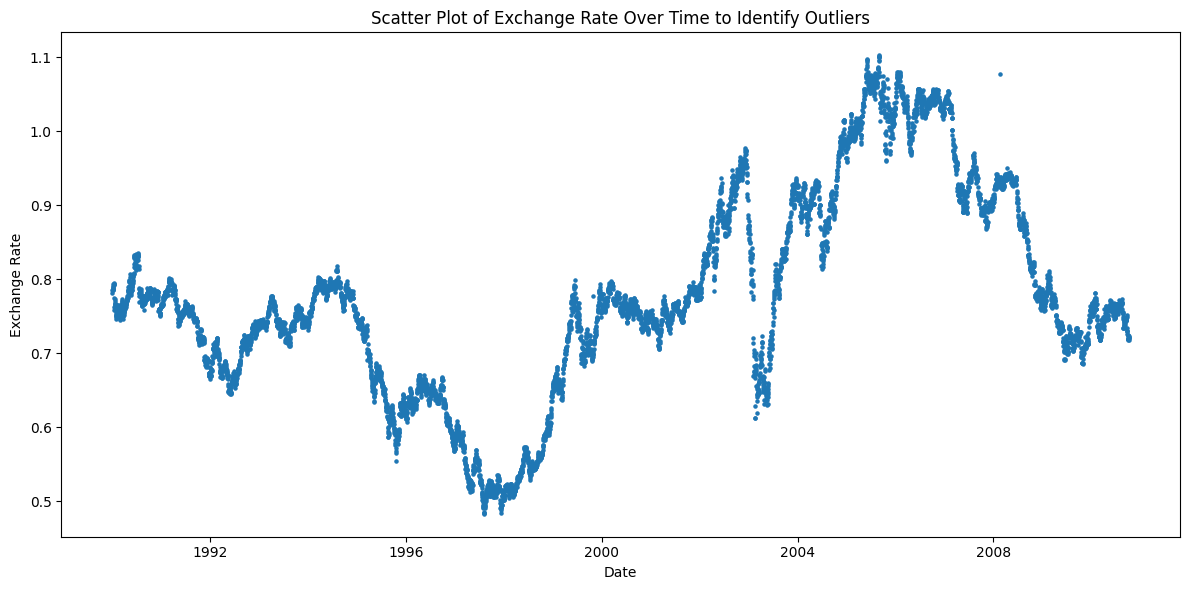

In [16]:
# Identify and quantify missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Identify obvious outliers using visualization (e.g., box plot)
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Ex_rate'])
plt.title('Box Plot of Exchange Rate to Identify Outliers')
plt.ylabel('Exchange Rate')
plt.show()

# You could also use a scatter plot over time to spot outliers
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['Ex_rate'], s=5) # s controls the size of the dots
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Scatter Plot of Exchange Rate Over Time to Identify Outliers')
plt.tight_layout()
plt.show()

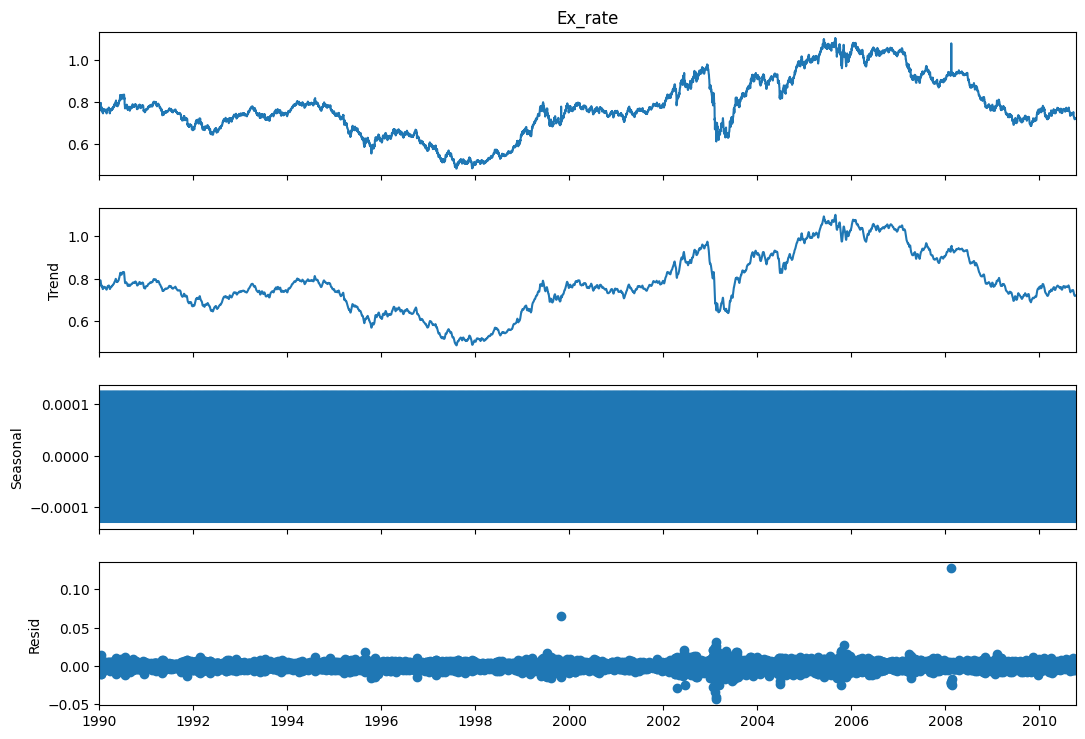


Decomposition components:
Trend:


,trend
date,
1990-01-01,NaN
1990-01-02,NaN
1990-01-03,NaN
1990-01-04,0.785729
1990-01-05,0.786514



Seasonal:


,seasonal
date,
1990-01-01,-0.000089
1990-01-02,0.000125
1990-01-03,0.000062
1990-01-04,-0.000104
1990-01-05,0.000050



Residual:


,resid
date,
1990-01-01,NaN
1990-01-02,NaN
1990-01-03,NaN
1990-01-04,0.000375
1990-01-05,-0.001664


In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition (using additive model as a starting point)
# You can try 'multiplicative' if the seasonality seems to increase with the trend
decomposition = seasonal_decompose(df['Ex_rate'], model='additive')

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

# Access the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

print("\nDecomposition components:")
print("Trend:")
display(trend.head())
print("\nSeasonal:")
display(seasonal.head())
print("\nResidual:")
display(residual.head())

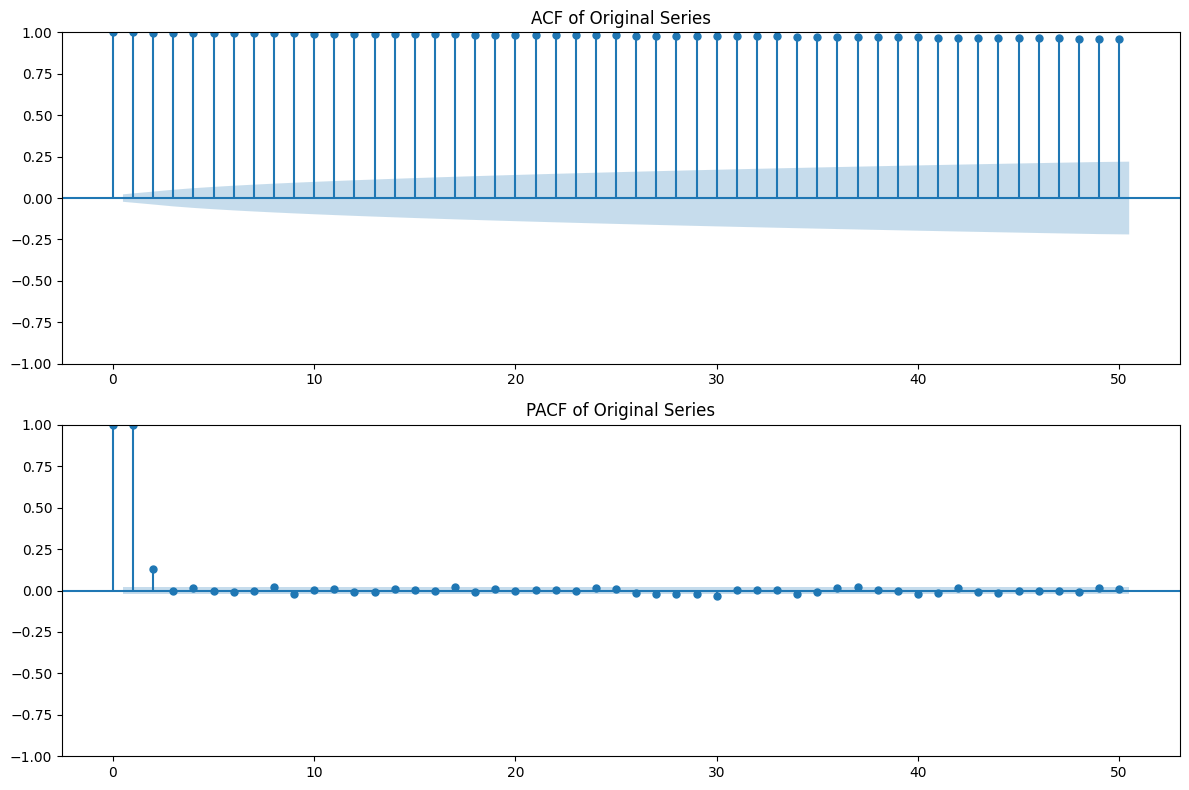

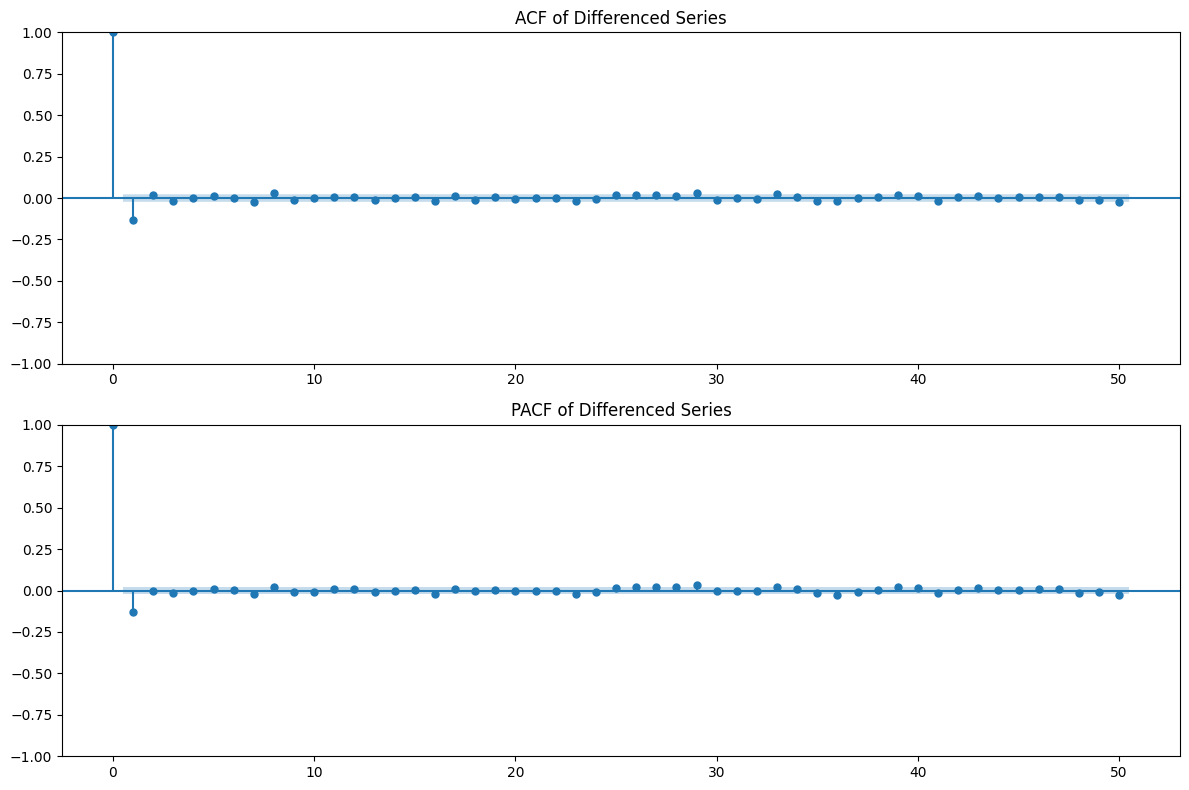

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF of the original series
plt.figure(figsize=(12, 8))
plt.subplot(211)
plot_acf(df['Ex_rate'], ax=plt.gca(), lags=50)
plt.title('ACF of Original Series')
plt.subplot(212)
plot_pacf(df['Ex_rate'], ax=plt.gca(), lags=50)
plt.title('PACF of Original Series')
plt.tight_layout()
plt.show()

# Plot ACF and PACF of the differenced series (first-order differencing)
df_diff = df['Ex_rate'].diff().dropna()

plt.figure(figsize=(12, 8))
plt.subplot(211)
plot_acf(df_diff, ax=plt.gca(), lags=50)
plt.title('ACF of Differenced Series')
plt.subplot(212)
plot_pacf(df_diff, ax=plt.gca(), lags=50)
plt.title('PACF of Differenced Series')
plt.tight_layout()
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1] <= 0.05:
        print("Conclusion: The series is likely stationary (reject H0)")
    else:
        print("Conclusion: The series is likely non-stationary (fail to reject H0)")

print("ADF Test Results:")
adf_test(df['Ex_rate'])

print("\n" + "="*50 + "\n")

# KPSS Test
def kpss_test(series):
    result = kpss(series, regression='c', nlags="auto")
    print('KPSS Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[3].items():
        print('\t%s: %.3f' % (key, value))
    if result[1] >= 0.05:
        print("Conclusion: The series is likely stationary (fail to reject H0)")
    else:
        print("Conclusion: The series is likely non-stationary (reject H0)")

print("KPSS Test Results:")
kpss_test(df['Ex_rate'])

ADF Test Results:
ADF Statistic: -1.664994
p-value: 0.449233
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Conclusion: The series is likely non-stationary (fail to reject H0)


KPSS Test Results:
KPSS Statistic: 5.291660
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Conclusion: The series is likely non-stationary (reject H0)


/tmp/ipython-input-3621542473.py:23: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c', nlags="auto")


In [20]:
# Perform first-order regular differencing
df_diff = df['Ex_rate'].diff().dropna()

print("Results for Differenced Series:")

# ADF Test on differenced series
print("\nADF Test Results (Differenced Series):")
adf_test(df_diff)

print("\n" + "="*50 + "\n")

# KPSS Test on differenced series
print("KPSS Test Results (Differenced Series):")
kpss_test(df_diff)

Results for Differenced Series:

ADF Test Results (Differenced Series):
ADF Statistic: -99.393431
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Conclusion: The series is likely stationary (reject H0)


KPSS Test Results (Differenced Series):
KPSS Statistic: 0.104210
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Conclusion: The series is likely stationary (fail to reject H0)


/tmp/ipython-input-3621542473.py:23: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c', nlags="auto")


In [21]:
# Choose a split point (e.g., last 10% of the data for testing)
train_size = int(len(df_diff) * 0.9)
train_data, test_data = df_diff[0:train_size], df_diff[train_size:]

print("Training set shape:", train_data.shape)
print("Testing set shape:", test_data.shape)

# Display the last few rows of the training set and the first few of the test set
print("\nLast few rows of Training Data:")
display(train_data.tail())
print("\nFirst few rows of Testing Data:")
display(test_data.head())

Training set shape: (6828,)
Testing set shape: (759,)

Last few rows of Training Data:


,Ex_rate
date,
2008-09-07,0.001018
2008-09-08,0.001131
2008-09-09,-0.002076
2008-09-10,-0.001741
2008-09-11,0.000000



First few rows of Testing Data:


,Ex_rate
date,
2008-09-12,0.000761
2008-09-13,-0.006298
2008-09-14,-0.003344
2008-09-15,-0.001062
2008-09-16,-0.007913


In [22]:
# Simple Naive Forecast: Predict the last value of the training set
last_train_value = train_data.iloc[-1]
naive_forecast = pd.Series(last_train_value, index=test_data.index)

print("Naive Forecast (first 5 values):")
display(naive_forecast.head())

# You can also calculate other baselines like mean forecast or seasonal naive if appropriate
# Mean Forecast: Predict the mean of the training set
# mean_forecast = pd.Series(train_data.mean(), index=test_data.index)
# print("\nMean Forecast (first 5 values):")
# display(mean_forecast.head())

# Seasonal Naive Forecast (requires identifying seasonality period)
# from statsmodels.tsa.seasonal import seasonal_naive
# seasonal_period = 7 # Example for daily data with weekly seasonality
# seasonal_naive_forecast = seasonal_naive(train_data, seasonal_period=seasonal_period, model='additive', last_value=False)
# print("\nSeasonal Naive Forecast (first 5 values):")
# display(seasonal_naive_forecast.head())

Naive Forecast (first 5 values):


,0
date,
2008-09-12,0.0
2008-09-13,0.0
2008-09-14,0.0
2008-09-15,0.0
2008-09-16,0.0


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Compute MAE
mae = mean_absolute_error(test_data, naive_forecast)
print(f'Naive Forecast MAE: {mae:.4f}')

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, naive_forecast))
print(f'Naive Forecast RMSE: {rmse:.4f}')

# Compute MAPE (handling potential division by zero if actual values are zero)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Handle cases where y_true is zero to avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Note: MAPE might not be suitable if your time series can have zero values.
# Using a small epsilon or removing zero values might be necessary.
# For simplicity here, we assume no zero values or handle them as above.
mape = mean_absolute_percentage_error(test_data, naive_forecast)
print(f'Naive Forecast MAPE: {mape:.4f}%')

Naive Forecast MAE: 0.0032
Naive Forecast RMSE: 0.0047
Naive Forecast MAPE: nan%


/tmp/ipython-input-4000440147.py:16: RuntimeWarning: invalid value encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [24]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model (example parameters - you'll need to tune these)
# For the differenced series, we might start with an ARMA(p, q) model,
# which corresponds to an ARIMA(p, 0, q) model on the differenced data.
# Based on ACF/PACF of differenced series, let's try p=2 and q=2 as a starting point.
# You might need to experiment with different p, d, q values.
# Since the series is differenced once (d=1), the ARIMA model for the original
# series would be ARIMA(p, 1, q). However, we are fitting to the already differenced data.
# So, let's fit an ARMA model to df_diff.
# If you want to fit ARIMA directly on the original series, the order would be (p, 1, q).

# Let's fit an ARIMA(2, 1, 2) model on the original data (df)
# This is equivalent to fitting an ARMA(2, 2) model on the differenced data (df_diff)
# Here, we will fit the ARIMA model on the original data with d=1.

# Choose the order (p, d, q) - based on ACF/PACF and stationarity tests
# We determined d=1 is needed for stationarity.
# From ACF/PACF of the differenced series, let's try p=2 and q=2 as a starting point.
# So, ARIMA order (p, d, q) = (2, 1, 2)

order = (2, 1, 2)

# Fit the ARIMA model
# Use the original dataframe 'df' for fitting the ARIMA model with d=1
model = ARIMA(df['Ex_rate'], order=order)
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# You can now use model_fit to make predictions

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(2, 1, 2)   Log Likelihood               28055.068
Date:                Thu, 09 Oct 2025   AIC                         -56100.135
Time:                        12:03:54   BIC                         -56065.464
Sample:                    01-01-1990   HQIC                        -56088.236
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1151      0.585     -0.197      0.844      -1.261       1.031
ar.L2          0.1132      0.088      1.293      0.196      -0.058       0.285
ma.L1         -0.0163      0.584     -0.028      0.9

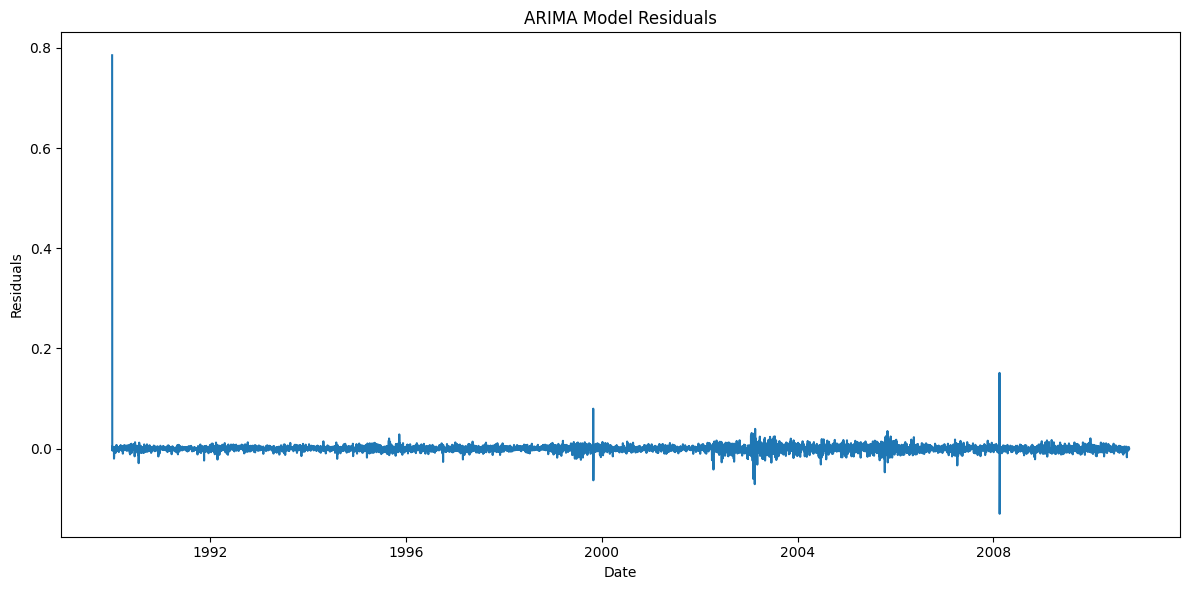

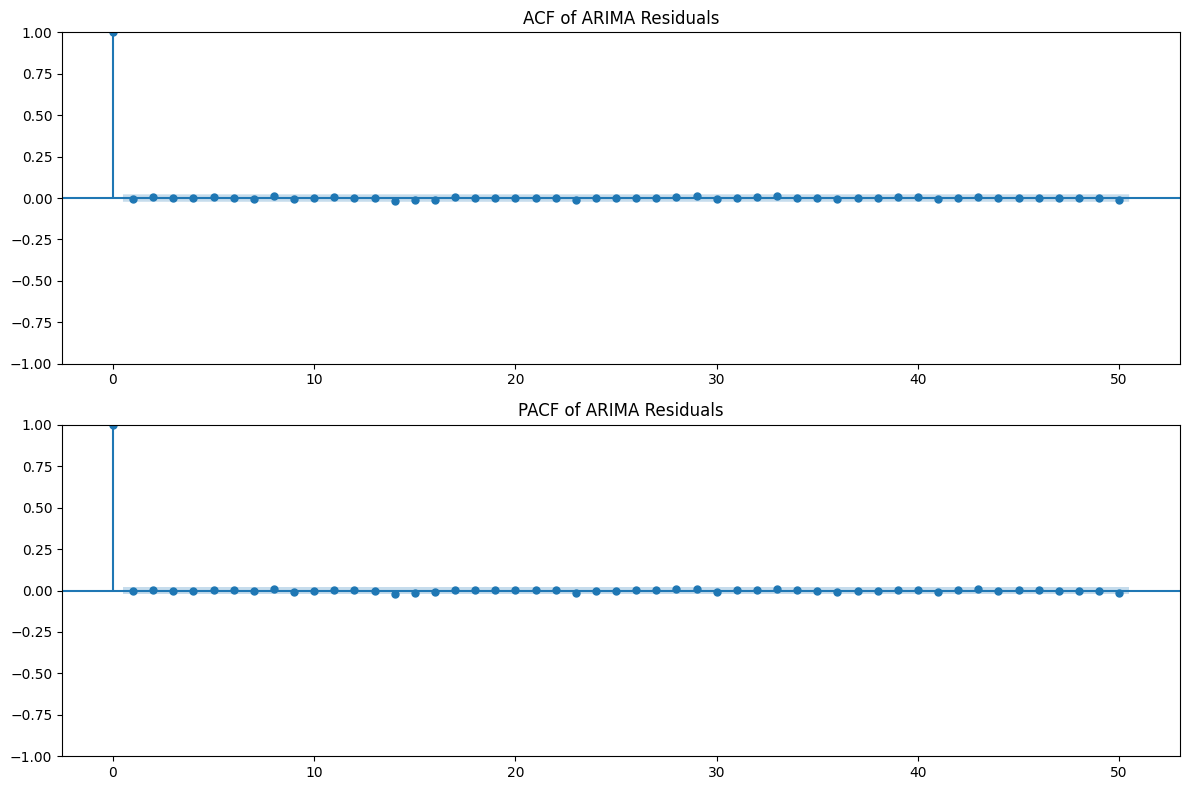


Ljung-Box Test Results on Residuals (for up to 10 lags):


,lb_stat,lb_pvalue
10,1.721949,0.998061


In [28]:
# Get the residuals from the fitted model
residuals = model_fit.resid

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('ARIMA Model Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

# Plot ACF and PACF of the residuals to check for remaining autocorrelation
plt.figure(figsize=(12, 8))
plt.subplot(211)
plot_acf(residuals, ax=plt.gca(), lags=50)
plt.title('ACF of ARIMA Residuals')
plt.subplot(212)
plot_pacf(residuals, ax=plt.gca(), lags=50)
plt.title('PACF of ARIMA Residuals')
plt.tight_layout()
plt.show()

# Perform Ljung-Box test on the residuals to formally test for autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox

# The Ljung-Box test requires the number of lags to test.
# A common choice is min(10, len(residuals)//5). Let's use 10 lags as an example.
# The 'boxpierce' test is also available, but Ljung-Box is generally preferred.
ljung_box_results = acorr_ljungbox(residuals, lags=[10], return_df=True)

print("\nLjung-Box Test Results on Residuals (for up to 10 lags):")
display(ljung_box_results)

# Interpretation: If the p-value is less than your significance level (e.g., 0.05),
# you reject the null hypothesis of no autocorrelation, suggesting the model may not be adequate.

In [25]:
# Make predictions on the test data
# The predict method of ARIMA returns predictions for the original series if d > 0
# Since we fitted ARIMA(2, 1, 2) on the original data, the predictions will be for the original series
# To compare with the differenced test_data, we need to difference the predictions or integrate the predictions

# Option 1: Predict the original series and then difference the predictions
# This might not be ideal as differencing predictions can lose information

# Option 2: Predict the differenced series directly if the model was fitted on differenced data (ARMA)
# Since we fitted ARIMA(2, 1, 2) on original data, we predict the original series.
# Let's predict the original series values for the test period and then compare the differenced values.

# Predict the original series values for the test data period
start_index = test_data.index[0]
end_index = test_data.index[-1]

predictions_original = model_fit.predict(start=start_index, end=end_index)

# Difference the predictions to compare with the differenced test_data
predictions_diff = predictions_original.diff().dropna()

# Align the predictions_diff with test_data (due to the diff operation)
# The first value of predictions_diff will be NaN, similar to test_data.diff()
# So we can compare from the second value onwards, or ensure the indices match.

# Let's re-calculate test_data_diff for comparison to be sure
test_data_diff_for_comparison = test_data.diff().dropna()

# Ensure the indices are aligned before calculating metrics
# Take the intersection of the indices
common_indices = predictions_diff.index.intersection(test_data_diff_for_comparison.index)

predictions_diff_aligned = predictions_diff[common_indices]
test_data_diff_aligned = test_data_diff_for_comparison[common_indices]


print("ARIMA Predictions (Differenced Series - first 5 values):")
display(predictions_diff_aligned.head())

# Now evaluate the model using the aligned differenced test data and predictions

ARIMA Predictions (Differenced Series - first 5 values):


,predicted_mean
2008-09-13,0.000653
2008-09-14,-0.005395
2008-09-15,-0.003727
2008-09-16,-0.001267
2008-09-17,-0.007060


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Evaluate the ARIMA model predictions on the differenced test data
# Using the aligned data: predictions_diff_aligned and test_data_diff_aligned

# Compute MAE
arima_mae = mean_absolute_error(test_data_diff_aligned, predictions_diff_aligned)
print(f'ARIMA Model MAE (Differenced Series): {arima_mae:.4f}')

# Compute RMSE
arima_rmse = np.sqrt(mean_squared_error(test_data_diff_aligned, predictions_diff_aligned))
print(f'ARIMA Model RMSE (Differenced Series): {arima_rmse:.4f}')

# Compute MAPE (handling potential division by zero)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Handle cases where y_true is zero to avoid division by zero
    # Using a small epsilon to avoid division by zero for very small values
    epsilon = 1e-8
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

arima_mape = mean_absolute_percentage_error(test_data_diff_aligned, predictions_diff_aligned)
print(f'ARIMA Model MAPE (Differenced Series): {arima_mape:.4f}%')

# Compare with Naive Forecast (calculated earlier on the differenced test_data)
print("\nComparison with Naive Forecast:")
print(f'Naive Forecast MAE: {mae:.4f}')
print(f'Naive Forecast RMSE: {rmse:.4f}')
# Note: MAPE for Naive Forecast was NaN due to zero values in the prediction,
# so direct comparison might not be meaningful unless handled.
# print(f'Naive Forecast MAPE: {mape:.4f}%')

ARIMA Model MAE (Differenced Series): 0.0076
ARIMA Model RMSE (Differenced Series): 0.0104
ARIMA Model MAPE (Differenced Series): 283.9864%

Comparison with Naive Forecast:
Naive Forecast MAE: 0.0032
Naive Forecast RMSE: 0.0047


**Evaluation Summary:**

Compare the MAE, RMSE, and MAPE of the ARIMA model with the Naive Forecast baseline. A lower value for these metrics indicates better performance.

*   **MAE (Mean Absolute Error):** The average absolute difference between the actual values and the predicted values.
*   **RMSE (Root Mean Squared Error):** The square root of the average of the squared differences between the actual and predicted values. It gives more weight to larger errors.
*   **MAPE (Mean Absolute Percentage Error):** The average absolute percentage difference between the actual and predicted values. It's scale-independent but can be problematic with zero values.

Based on the comparison, you can assess whether the ARIMA model provides an improvement over a simple baseline.

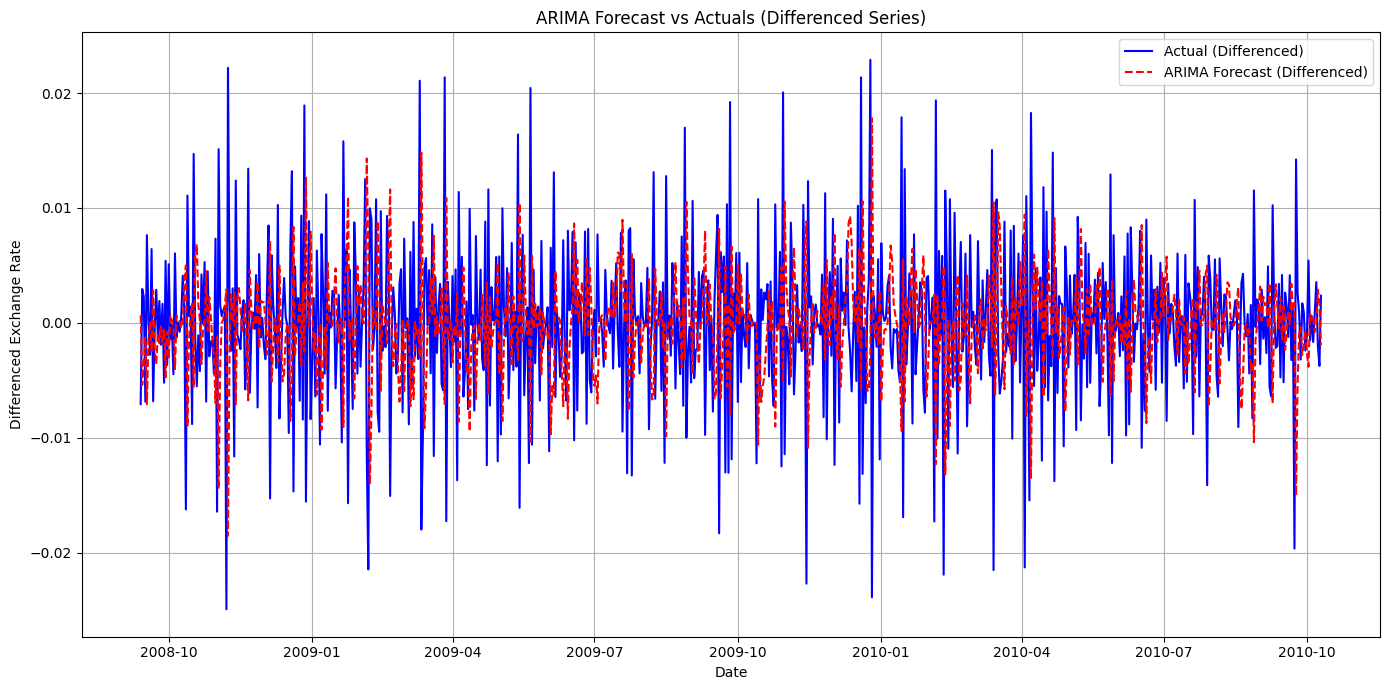

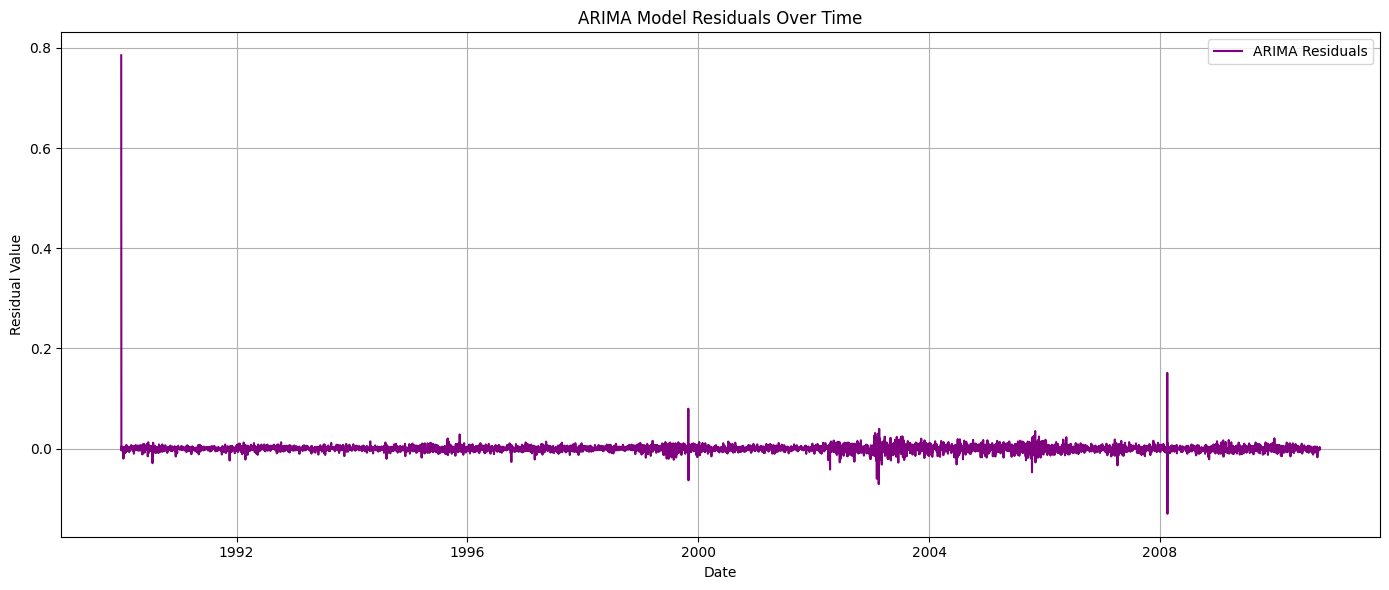

In [29]:
# Plotting Actuals vs Forecasts (Differenced Series)
plt.figure(figsize=(14, 7))
plt.plot(test_data_diff_aligned.index, test_data_diff_aligned, label='Actual (Differenced)', color='blue')
plt.plot(predictions_diff_aligned.index, predictions_diff_aligned, label='ARIMA Forecast (Differenced)', color='red', linestyle='--')
plt.title('ARIMA Forecast vs Actuals (Differenced Series)')
plt.xlabel('Date')
plt.ylabel('Differenced Exchange Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting Residuals over Time
plt.figure(figsize=(14, 6))
plt.plot(residuals.index, residuals, label='ARIMA Residuals', color='purple')
plt.title('ARIMA Model Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Note: The residuals plotted here are from the model fit on the training data.
# To see residuals on the test set, you would calculate the difference
# between the actual test_data_diff_aligned and predictions_diff_aligned.

# Optional: Plot residuals on the test set
# test_residuals = test_data_diff_aligned - predictions_diff_aligned
# plt.figure(figsize=(14, 6))
# plt.plot(test_residuals.index, test_residuals, label='ARIMA Residuals (Test Set)', color='green')
# plt.title('ARIMA Model Residuals on Test Set Over Time')
# plt.xlabel('Date')
# plt.ylabel('Residual Value')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

To inspect the decomposition plot (`fig = decomposition.plot()`) and decide on the appropriate ETS model family and components:

1.  **Trend Component:** Look at the 'Trend' plot.
    *   Does the trend appear to be increasing, decreasing, or staying relatively constant over time?
    *   Does the strength of the trend seem to change over time?

2.  **Seasonal Component:** Look at the 'Seasonal' plot.
    *   Is there a clear, repeating pattern at a fixed frequency (e.g., daily, weekly, monthly)?
    *   Does the magnitude of the seasonal fluctuations seem to be constant over time (additive seasonality) or does it increase/decrease with the level of the series (multiplicative seasonality)?
        *   If the seasonal fluctuations are roughly constant in amplitude, an **additive** model might be appropriate.
        *   If the seasonal fluctuations vary in amplitude proportionally to the level of the series, a **multiplicative** model might be appropriate.

3.  **Residual Component:** Look at the 'Residual' plot.
    *   The residuals should ideally look like random noise, with no discernible patterns, trends, or seasonality remaining.
    *   Are the residuals centered around zero?

**Choosing ETS Components:**

*   **Error (E):** This relates to the variability of the residuals. It's often assumed to be additive or multiplicative based on the overall model choice.
*   **Trend (T):**
    *   If there is a trend, you need a trend component.
    *   Consider if the trend is likely to continue linearly (Additive Trend - A) or if its growth/decay rate might change (Multiplicative Trend - M).
    *   A **Damped Trend (Ad or Md)** might be appropriate if the trend is expected to level off over time. Look at the end of the trend component plot to see if it appears to be flattening.
*   **Seasonality (S):**
    *   If there is a clear seasonal pattern in the 'Seasonal' plot, you need a seasonal component.
    *   Choose **Additive Seasonality (A)** if the seasonal fluctuations have constant amplitude.
    *   Choose **Multiplicative Seasonality (M)** if the seasonal fluctuations have amplitude proportional to the level of the series.

Based on these observations, you can then consider different ETS model combinations (e.g., ETS(A, A, A), ETS(M, A, M), ETS(A, Ad, A), etc.) and often select the best one based on information criteria like AIC, BIC, or by evaluating performance on a validation set.

In [30]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

# Fit Simple Exponential Smoothing (no trend, no seasonality)
# This is a baseline model for series without clear trend or seasonality.
ses_model = SimpleExpSmoothing(df['Ex_rate']).fit()
ses_forecast = ses_model.forecast(len(test_data))

print("Simple Exponential Smoothing Model Summary:")
print(ses_model.summary())
print("\nSimple Exponential Smoothing Forecast (first 5 values):")
display(ses_forecast.head())

print("\n" + "="*50 + "\n")

# Fit Holt's Method (with trend, no seasonality)
# Use this if there is a trend but no clear seasonality.
# You can try additive ('add') or multiplicative ('mul') trend.
# damped_trend=True can be added if the trend is expected to level off.
holt_model_add = Holt(df['Ex_rate'], exponential=False).fit() # Additive trend
holt_forecast_add = holt_model_add.forecast(len(test_data))

print("Holt's Additive Trend Model Summary:")
print(holt_model_add.summary())
print("\nHolt's Additive Trend Forecast (first 5 values):")
display(holt_forecast_add.head())

# Optional: Fit Holt's method with damped trend if appropriate
# holt_model_damped = Holt(df['Ex_rate'], exponential=False, damped_trend=True).fit()
# holt_forecast_damped = holt_model_damped.forecast(len(test_data))
# print("\n" + "="*50 + "\n")
# print("Holt's Damped Additive Trend Model Summary:")
# print(holt_model_damped.summary())
# print("\nHolt's Damped Additive Trend Forecast (first 5 values):")
# display(holt_forecast_damped.head())


print("\n" + "="*50 + "\n")

# Fit Holt-Winters Seasonal Method (with trend and seasonality)
# Use this if there is both trend and seasonality.
# You need to specify the seasonal_periods (e.g., 7 for daily data with weekly seasonality).
# You can try additive ('add') or multiplicative ('mul') trend and seasonality.
# damped_trend=True can be added if the trend is expected to level off.

# Assuming daily data with weekly seasonality (seasonal_periods=7) based on typical patterns, adjust if needed.
seasonal_period = 7

# Additive trend and additive seasonality
hw_model_add_add = ExponentialSmoothing(df['Ex_rate'], seasonal='add', seasonal_periods=seasonal_period, trend='add').fit()
hw_forecast_add_add = hw_model_add_add.forecast(len(test_data))

print(f"Holt-Winters Additive Trend, Additive Seasonality (Period={seasonal_period}) Model Summary:")
print(hw_model_add_add.summary())
print("\nHolt-Winters Additive Trend, Additive Seasonality Forecast (first 5 values):")
display(hw_forecast_add_add.head())

print("\n" + "="*50 + "\n")

# Optional: Multiplicative trend and additive seasonality
# hw_model_mul_add = ExponentialSmoothing(df['Ex_rate'], seasonal='add', seasonal_periods=seasonal_period, trend='mul').fit()
# hw_forecast_mul_add = hw_model_mul_add.forecast(len(test_data))
# print(f"Holt-Winters Multiplicative Trend, Additive Seasonality (Period={seasonal_period}) Model Summary:")
# print(hw_model_mul_add.summary())
# print("\nHolt-Winters Multiplicative Trend, Additive Seasonality Forecast (first 5 values):")
# display(hw_forecast_mul_add.head())
# print("\n" + "="*50 + "\n")

# Optional: Additive trend and multiplicative seasonality
# hw_model_add_mul = ExponentialSmoothing(df['Ex_rate'], seasonal='mul', seasonal_periods=seasonal_period, trend='add').fit()
# hw_forecast_add_mul = hw_model_add_mul.forecast(len(test_data))
# print(f"Holt-Winters Additive Trend, Multiplicative Seasonality (Period={seasonal_period}) Model Summary:")
# print(hw_model_add_mul.summary())
# print("\nHolt-Winters Additive Trend, Multiplicative Seasonality Forecast (first 5 values):")
# display(hw_forecast_add_mul.head())
# print("\n" + "="*50 + "\n")

# Optional: Multiplicative trend and multiplicative seasonality
# hw_model_mul_mul = ExponentialSmoothing(df['Ex_rate'], seasonal='mul', seasonal_periods=seasonal_period, trend='mul').fit()
# hw_forecast_mul_mul = hw_model_mul_mul.forecast(len(test_data))
# print(f"Holt-Winters Multiplicative Trend, Multiplicative Seasonality (Period={seasonal_period}) Model Summary:")
# print(hw_model_mul_mul.summary())
# print("\nHolt-Winters Multiplicative Trend, Multiplicative Seasonality Forecast (first 5 values):")
# display(hw_forecast_mul_mul.head())
# print("\n" + "="*50 + "\n")

# You will need to evaluate the performance of each fitted model on the test data
# using metrics like MAE, RMSE, MAPE to compare them and choose the best one.

Simple Exponential Smoothing Model Summary:
                       SimpleExpSmoothing Model Results                       
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:             SimpleExpSmoothing   SSE                              0.273
Optimized:                       True   AIC                         -77644.985
Trend:                           None   BIC                         -77631.116
Seasonal:                        None   AICC                        -77644.980
Seasonal Periods:                None   Date:                 Thu, 09 Oct 2025
Box-Cox:                        False   Time:                         12:08:32
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8698462                alpha                 True
initial_

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,0
2010-10-11,0.720861
2010-10-12,0.720861
2010-10-13,0.720861
2010-10-14,0.720861
2010-10-15,0.720861


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)




Holt's Additive Trend Model Summary:
                              Holt Model Results                              
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                           Holt   SSE                              0.275
Optimized:                       True   AIC                         -77583.308
Trend:                       Additive   BIC                         -77555.571
Seasonal:                        None   AICC                        -77583.297
Seasonal Periods:                None   Date:                 Thu, 09 Oct 2025
Box-Cox:                        False   Time:                         12:08:32
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8695446                alpha                 True
smoothing_tre

,0
2010-10-11,0.720590
2010-10-12,0.720353
2010-10-13,0.720117
2010-10-14,0.719881
2010-10-15,0.719644


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Holt-Winters Additive Trend, Additive Seasonality (Period=7) Model Summary:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77631.186
Trend:                         Additive   BIC                         -77554.909
Seasonal:                      Additive   AICC                        -77631.138
Seasonal Periods:                     7   Date:                 Thu, 09 Oct 2025
Box-Cox:                          False   Time:                         12:08:35
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0

,0
2010-10-11,0.720865
2010-10-12,0.721067
2010-10-13,0.721000
2010-10-14,0.720824
2010-10-15,0.720972


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_forecast(y_true, y_pred, model_name):
    """Evaluates forecast accuracy using MAE, RMSE, and MAPE."""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # Compute MAPE (handling potential division by zero)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        # Handle cases where y_true is zero to avoid division by zero
        # Using a small epsilon to avoid division by zero for very small values
        epsilon = 1e-8
        return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f'{model_name} Evaluation:')
    print(f'  MAE: {mae:.4f}')
    print(f'  RMSE: {rmse:.4f}')
    print(f'  MAPE: {mape:.4f}%')
    print("-" * 20)

# Evaluate Simple Exponential Smoothing
evaluate_forecast(test_data.squeeze(), ses_forecast, "Simple Exponential Smoothing")

# Evaluate Holt's Additive Trend
evaluate_forecast(test_data.squeeze(), holt_forecast_add, "Holt's Additive Trend")

# Evaluate Holt-Winters Additive Trend and Additive Seasonality
# Ensure the index of the forecast matches the test data index for accurate evaluation
hw_forecast_add_add.index = test_data.index
evaluate_forecast(test_data.squeeze(), hw_forecast_add_add, "Holt-Winters Additive Trend, Additive Seasonality")

# You can add evaluation for other models if you uncommented and fitted them
# For example:
# evaluate_forecast(test_data.squeeze(), holt_forecast_damped, "Holt's Damped Additive Trend")
# hw_forecast_mul_add.index = test_data.index
# evaluate_forecast(test_data.squeeze(), hw_forecast_mul_add, "Holt-Winters Multiplicative Trend, Additive Seasonality")
# hw_forecast_add_mul.index = test_data.index
# evaluate_forecast(test_data.squeeze(), hw_forecast_add_mul, "Holt-Winters Additive Trend, Multiplicative Seasonality")
# hw_forecast_mul_mul.index = test_data.index
# evaluate_forecast(test_data.squeeze(), hw_forecast_mul_mul, "Holt-Winters Multiplicative Trend, Multiplicative Seasonality")

Simple Exponential Smoothing Evaluation:
  MAE: 0.7210
  RMSE: 0.7210
  MAPE: 835879530.1108%
--------------------
Holt's Additive Trend Evaluation:
  MAE: 0.6312
  RMSE: 0.6333
  MAPE: 742318318.3794%
--------------------
Holt-Winters Additive Trend, Additive Seasonality Evaluation:
  MAE: 0.7179
  RMSE: 0.7179
  MAPE: 832554007.6769%
--------------------


--- Residual Diagnostics for Simple Exponential Smoothing ---


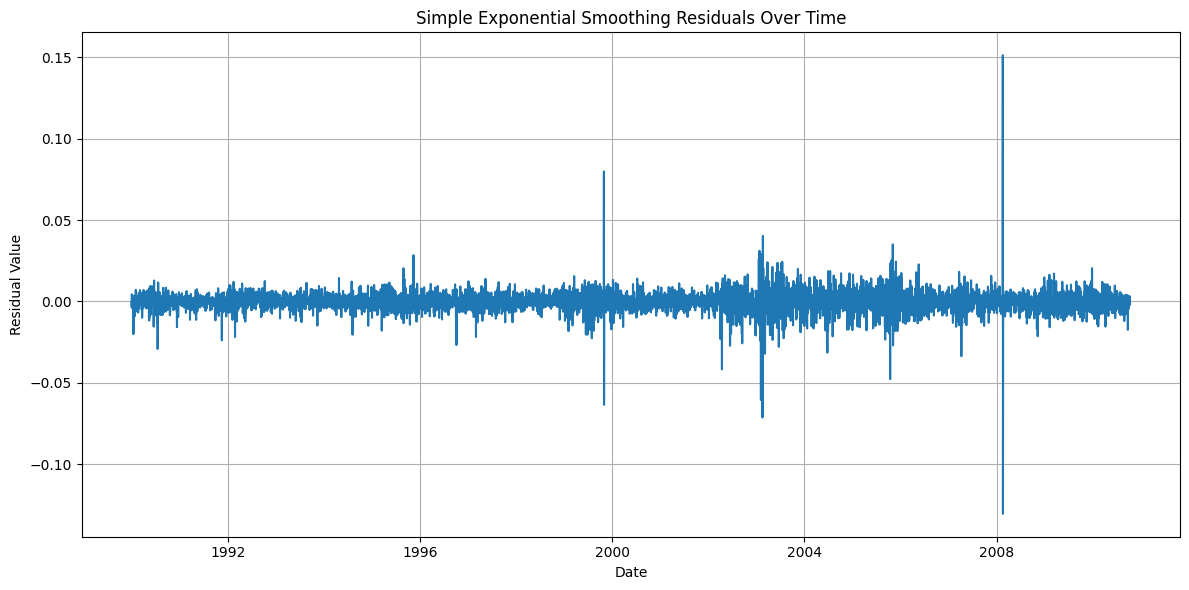

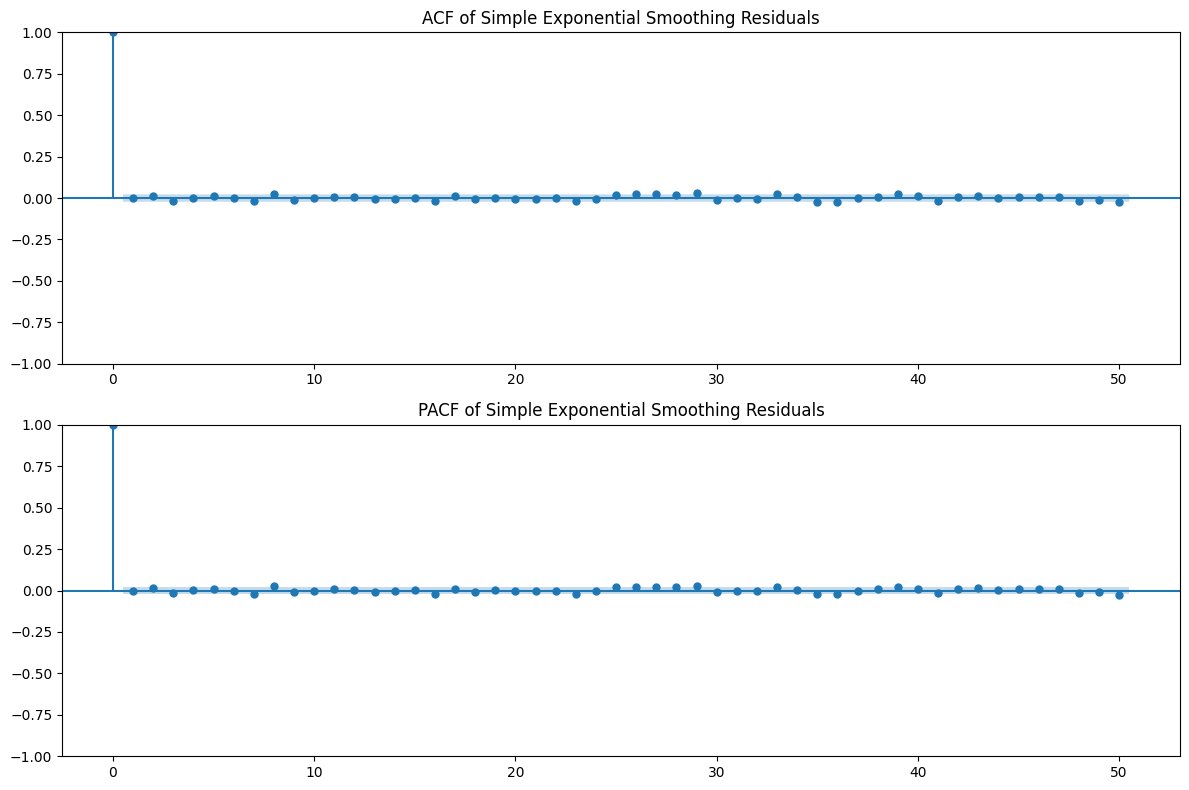


Ljung-Box Test Results on Simple Exponential Smoothing Residuals (for up to 10 lags):


,lb_stat,lb_pvalue
10,12.657745,0.243442



Mean of Simple Exponential Smoothing Residuals: -0.000010
Interpretation: Residuals appear unbiased.


--- Residual Diagnostics for Holt's Additive Trend ---


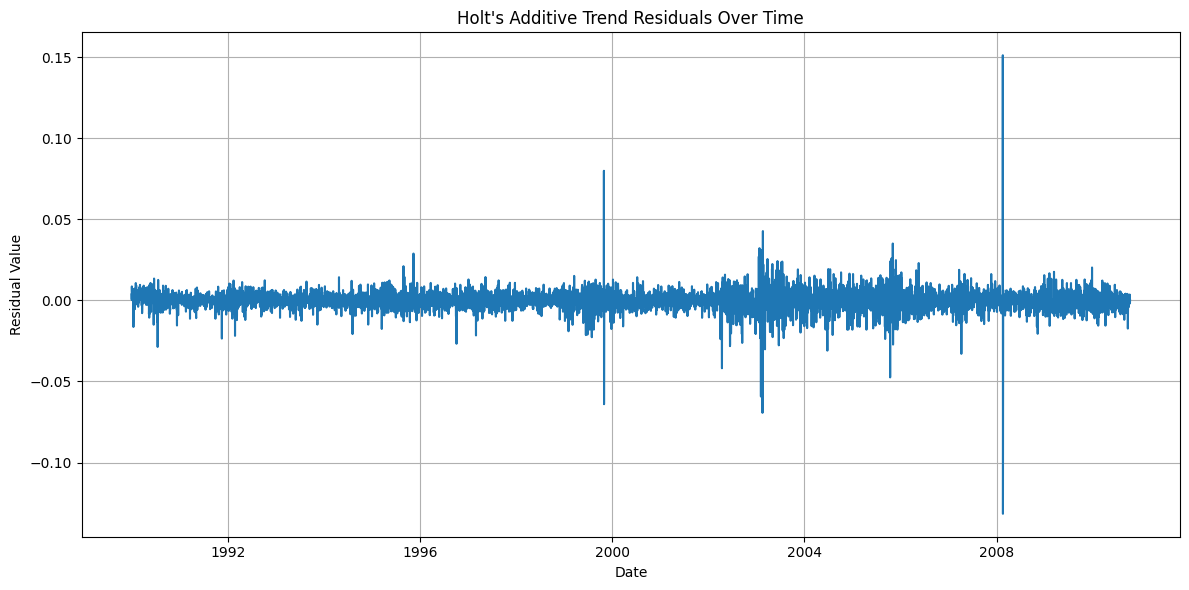

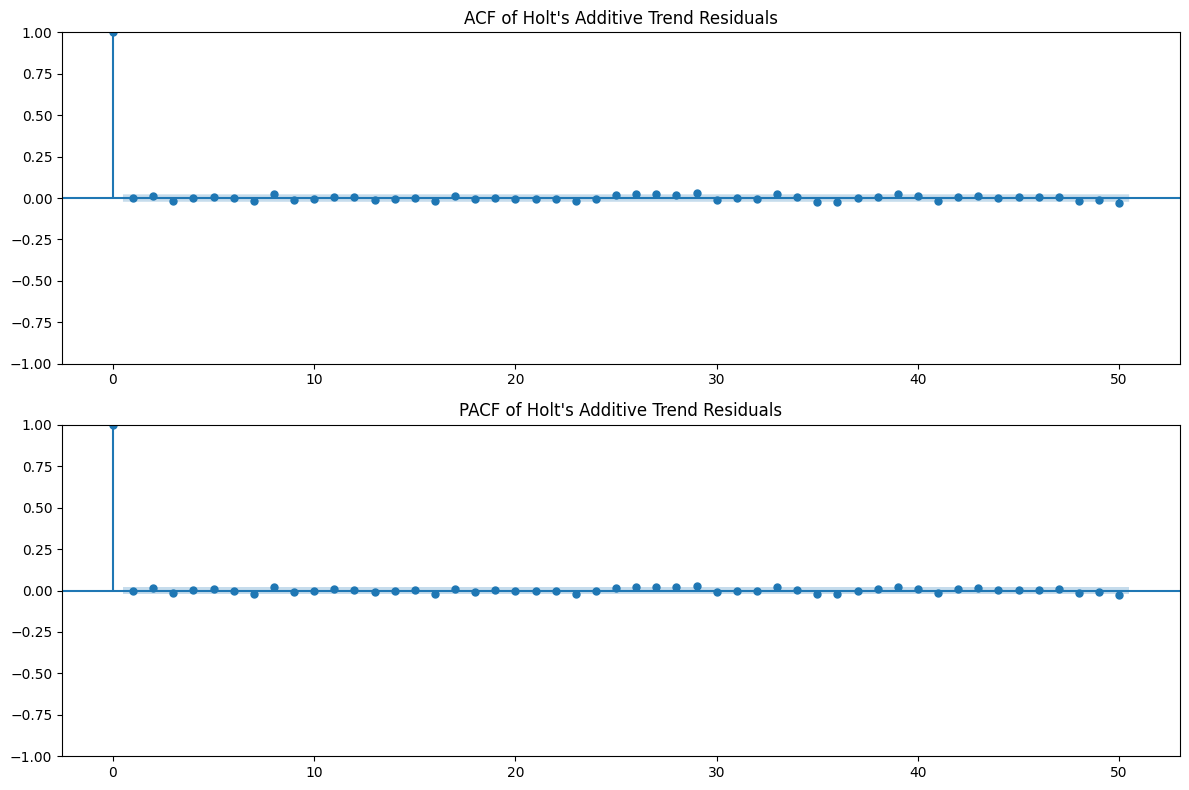


Ljung-Box Test Results on Holt's Additive Trend Residuals (for up to 10 lags):


,lb_stat,lb_pvalue
10,12.746927,0.238168



Mean of Holt's Additive Trend Residuals: 0.000059
Interpretation: Residuals appear unbiased.


--- Residual Diagnostics for Holt-Winters Additive Trend, Additive Seasonality ---


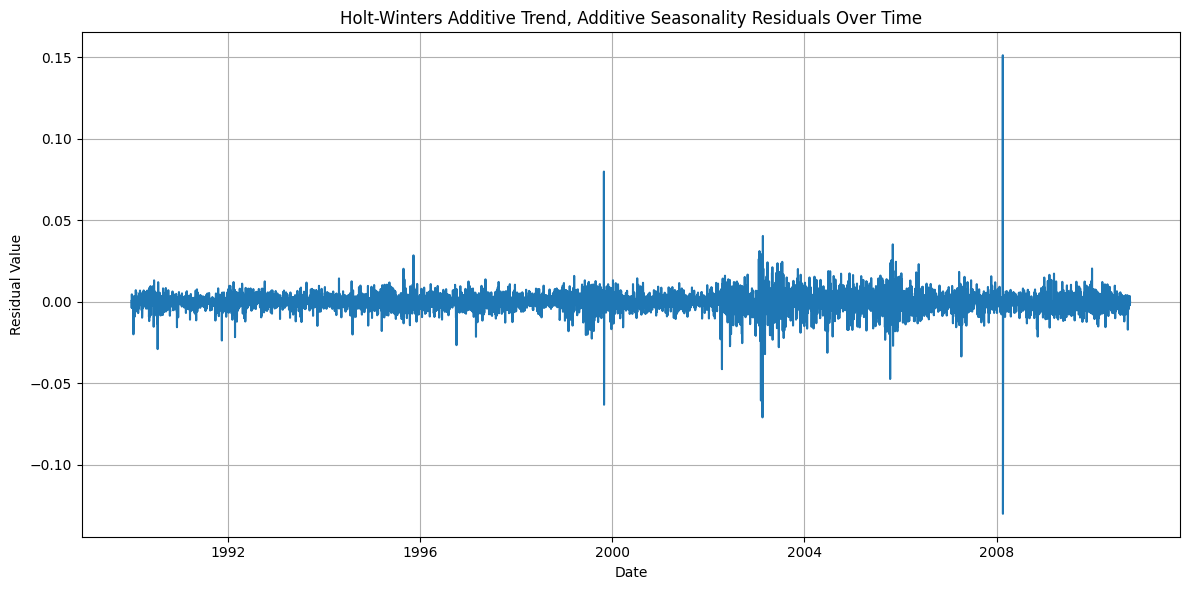

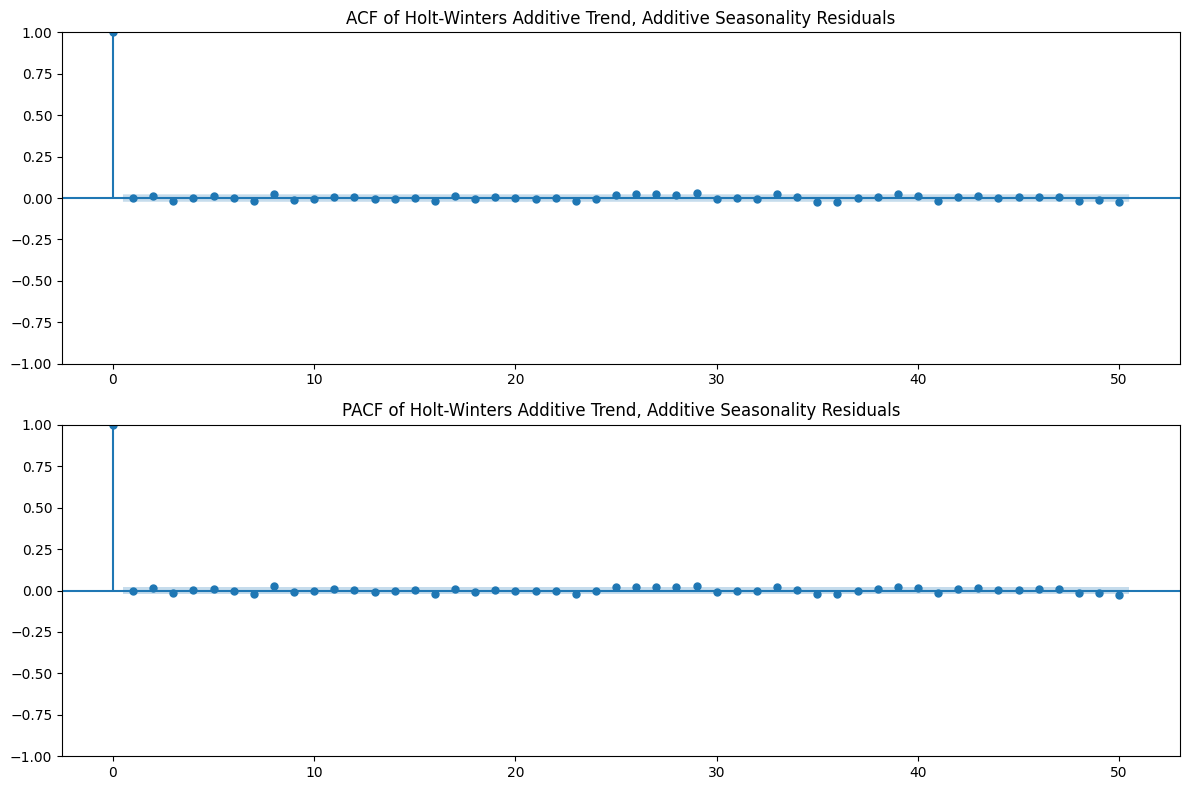


Ljung-Box Test Results on Holt-Winters Additive Trend, Additive Seasonality Residuals (for up to 10 lags):


,lb_stat,lb_pvalue
10,13.076197,0.219443



Mean of Holt-Winters Additive Trend, Additive Seasonality Residuals: -0.000000
Interpretation: Residuals appear unbiased.




In [32]:
# Get residuals for each fitted Exponential Smoothing model
ses_residuals = ses_model.resid
holt_add_residuals = holt_model_add.resid
hw_add_add_residuals = hw_model_add_add.resid

# Function to perform residual diagnostics
def analyze_residuals(residuals, model_name):
    print(f"--- Residual Diagnostics for {model_name} ---")

    # Plot residuals over time
    plt.figure(figsize=(12, 6))
    plt.plot(residuals.index, residuals)
    plt.title(f'{model_name} Residuals Over Time')
    plt.xlabel('Date')
    plt.ylabel('Residual Value')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot ACF and PACF of residuals
    plt.figure(figsize=(12, 8))
    plt.subplot(211)
    plot_acf(residuals.dropna(), ax=plt.gca(), lags=50)
    plt.title(f'ACF of {model_name} Residuals')
    plt.subplot(212)
    plot_pacf(residuals.dropna(), ax=plt.gca(), lags=50)
    plt.title(f'PACF of {model_name} Residuals')
    plt.tight_layout()
    plt.show()

    # Perform Ljung-Box test on residuals
    try:
        ljung_box_results = acorr_ljungbox(residuals.dropna(), lags=[10], return_df=True)
        print(f"\nLjung-Box Test Results on {model_name} Residuals (for up to 10 lags):")
        display(ljung_box_results)
    except Exception as e:
        print(f"Could not perform Ljung-Box test for {model_name}: {e}")

    # Check for bias (mean of residuals should be close to zero)
    residual_mean = residuals.mean()
    print(f"\nMean of {model_name} Residuals: {residual_mean:.6f}")
    if abs(residual_mean) > 0.01: # Threshold for bias, can be adjusted
        print(f"Interpretation: Residuals may have a bias.")
    else:
        print(f"Interpretation: Residuals appear unbiased.")

    print("\n" + "="*50 + "\n")


# Analyze residuals for each fitted model
analyze_residuals(ses_residuals, "Simple Exponential Smoothing")
analyze_residuals(holt_add_residuals, "Holt's Additive Trend")
analyze_residuals(hw_add_add_residuals, "Holt-Winters Additive Trend, Additive Seasonality")

# Analyze residuals for other models if you fitted them
# analyze_residuals(holt_damped_residuals, "Holt's Damped Additive Trend")
# analyze_residuals(hw_mul_add_residuals, "Holt-Winters Multiplicative Trend, Additive Seasonality")
# analyze_residuals(hw_add_mul_residuals, "Holt-Winters Additive Trend, Multiplicative Seasonality")
# analyze_residuals(hw_mul_mul_residuals, "Holt-Winters Multiplicative Trend, Multiplicative Seasonality")

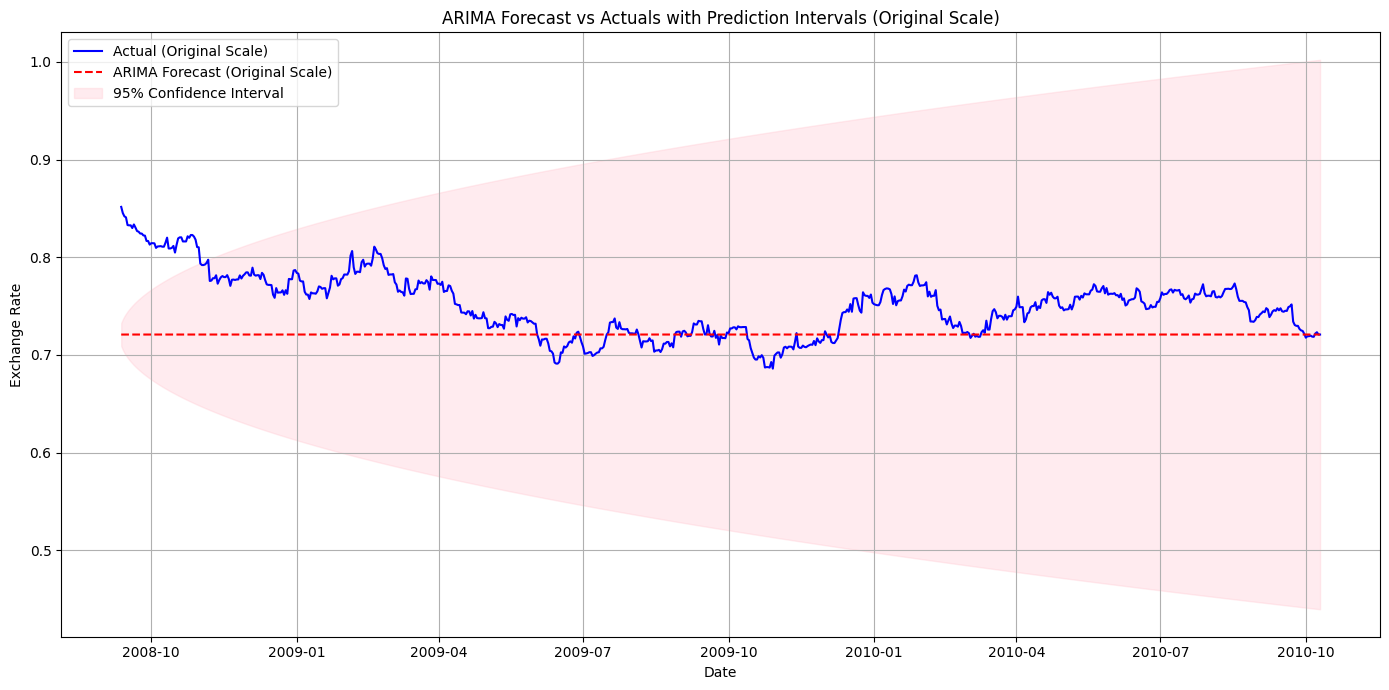

In [33]:
# Forecast on the test set with prediction intervals using the fitted ARIMA model
# The get_forecast method provides confidence intervals
# Since we fitted ARIMA(2, 1, 2) on original data, the forecast is on the original scale

start_index = test_data.index[0]
end_index = test_data.index[-1]

# Get forecast with confidence intervals
forecast_results = model_fit.get_forecast(steps=len(test_data)) # Forecast for the length of the test data

# Extract the forecasted values and confidence intervals
forecast_mean = forecast_results.predicted_mean
conf_int = forecast_results.conf_int(alpha=0.05) # 95% confidence interval

# Ensure the forecast index aligns with the test data index for plotting
forecast_mean.index = test_data.index
conf_int.index = test_data.index

# Plot the actuals and the forecast with prediction intervals
plt.figure(figsize=(14, 7))

# Plot the training data (optional, for context)
# plt.plot(df['Ex_rate'].index, df['Ex_rate'], label='Training Data (Original)')

# Plot the actual test data (on the original scale - we need to integrate the differenced test_data)
# Since we fitted ARIMA on the original data, the 'test_data' we have is already differenced.
# To plot actuals on the original scale, we need to integrate the test_data starting from the last training value.
# However, for direct comparison with the ARIMA forecast (which is on the original scale),
# we should compare the forecast with the actuals on the original scale.
# The ARIMA model was fitted on 'df' (original scale). The 'test_data' is the differenced series.
# To get the actual original values for the test period, we should use the original df and slice it.

actual_test_original = df['Ex_rate'][start_index:end_index]


plt.plot(actual_test_original.index, actual_test_original, label='Actual (Original Scale)', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='ARIMA Forecast (Original Scale)', color='red', linestyle='--')

# Plot the confidence intervals
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('ARIMA Forecast vs Actuals with Prediction Intervals (Original Scale)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Note: If you choose a different model (e.g., ETS) as your best model,
# you will need to adapt the forecasting code to that specific model's
# forecasting method and how it handles prediction intervals.
# For ETS models from statsmodels, the .forecast() method can often
# return confidence intervals if the 'level' parameter is specified.

# Task
Perform rolling-origin cross-validation (time-series CV) or multiple train/test splits to assess stability of forecasts.

## Define cross-validation strategy

### Subtask:
Determine the initial training period size, the step size for rolling the origin, and the size of the forecasting horizon (test set size).


**Reasoning**:
Determine the initial training period size, step size, and forecast horizon based on the data characteristics and task requirements. The data spans about 20 years, so an initial training size of 5-10 years is reasonable. A step size of a year and a forecast horizon of a year will allow for multiple evaluations over different periods.



In [34]:
# Determine the initial training period size (e.g., 8 years of daily data)
# Total data points: 7588 (approx 20 years of daily data)
# 8 years * 365 days/year = 2920 days (approx)
initial_train_size = 8 * 365

# Decide on a step size for rolling the origin (e.g., 1 year of daily data)
step_size = 1 * 365

# Define the size of the forecasting horizon (test set size) for each fold (e.g., 1 year of daily data)
forecast_horizon = 1 * 365

print(f"Initial Training Size: {initial_train_size} data points")
print(f"Step Size: {step_size} data points")
print(f"Forecast Horizon: {forecast_horizon} data points")

Initial Training Size: 2920 data points
Step Size: 365 data points
Forecast Horizon: 365 data points


## Iterate through splits

### Subtask:
Loop through the time series data, creating train and test sets based on the defined rolling window.


**Reasoning**:
Initialize the splits list and set the starting point for the loop.



In [35]:
# 1. Initialize an empty list called splits
splits = []

# 2. Set the starting point for the first training set's end index
train_end_start = initial_train_size

**Reasoning**:
Loop through the data, creating train and test sets based on the rolling window and appending the indices to the splits list.



In [36]:
# 3. Use a while loop to iterate through the time series
# The loop continues as long as the end index of the test set is within the bounds of the total data length.
# The end index of the test set is train_end + forecast_horizon
while train_end_start + forecast_horizon <= len(df_diff): # Use df_diff length as splits are based on differenced data
    # 4. Calculate the start index of the current training set (which is always 0)
    train_start = 0

    # 5. Calculate the end index of the current training set
    train_end = train_end_start

    # 6. Calculate the start index of the current test set
    test_start = train_end

    # 7. Calculate the end index of the current test set
    test_end = test_start + forecast_horizon

    # 8. Append a tuple containing the start and end indices of the training set
    # and the start and end indices of the test set to the splits list.
    splits.append(((train_start, train_end), (test_start, test_end)))

    # 9. Increment the end index of the training set and the end index of the test set by step_size for the next iteration.
    train_end_start += step_size

# 10. After the loop, print the number of splits created and the indices for the first few splits to verify the process.
print(f"Number of splits created: {len(splits)}")
print("\nFirst few splits (train_indices, test_indices):")
for i in range(min(5, len(splits))):
    print(splits[i])

Number of splits created: 12

First few splits (train_indices, test_indices):
((0, 2920), (2920, 3285))
((0, 3285), (3285, 3650))
((0, 3650), (3650, 4015))
((0, 4015), (4015, 4380))
((0, 4380), (4380, 4745))


## Fit model

### Subtask:
For each split, fit the chosen time series model (e.g., ARIMA or the best ETS model) on the training data.


**Reasoning**:
Initialize an empty list to store fitted models and then iterate through the generated splits to fit the ARIMA model to the training data for each split.



In [37]:
# 1. Initialize an empty list called fitted_models
fitted_models = []

# 2. Start a loop that iterates through each split in the splits list
for split in splits:
    # 3. Inside the loop, extract the start and end indices for the training set from the current split.
    train_start_idx, train_end_idx = split[0]

    # 4. Use these indices to create the training data subset from the original df
    # We are fitting ARIMA(p, 1, q) to the original data.
    train_data_split = df['Ex_rate'].iloc[train_start_idx:train_end_idx]

    # 5. Fit the chosen model (ARIMA(2, 1, 2)) to this training data subset.
    # Use the order determined in previous steps.
    order = (2, 1, 2) # (p, d, q)

    try:
        # Fit the ARIMA model to the training data split
        model = ARIMA(train_data_split, order=order)
        model_fit = model.fit()

        # 6. Store the fitted model object in the fitted_models list.
        fitted_models.append(model_fit)

    except Exception as e:
        print(f"Error fitting model for split ending at index {train_end_idx}: {e}")
        # Optionally, you could append None or handle the error differently
        fitted_models.append(None)


# 7. After the loop, you can optionally print the number of fitted models to confirm that a model was fitted for each split.
print(f"Number of fitted models: {len(fitted_models)}")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  

Number of fitted models: 12


## Forecast

### Subtask:
Generate forecasts for the test period using the fitted model.


**Reasoning**:
Generate forecasts for each test set using the corresponding fitted model and store them in a list.



In [38]:
# 1. Initialize an empty list called forecasts
forecasts = []

# 2. Loop through the fitted_models list and the splits list simultaneously.
for model_fit, split in zip(fitted_models, splits):
    # 3. Inside the loop, for each fitted model and its corresponding split:
    if model_fit is not None: # Ensure the model was fitted successfully
        # a. Extract the start and end indices of the test set from the current split.
        _, (test_start_idx, test_end_idx) = split

        # Calculate the number of steps to forecast
        steps_to_forecast = test_end_idx - test_start_idx

        # b. Use the .forecast() method of the fitted model to generate forecasts for the number of steps equal to the length of the test set.
        # The forecast method of ARIMA fitted on original data will return predictions on the original scale.
        forecast = model_fit.forecast(steps=steps_to_forecast)

        # c. Store the generated forecast series in the forecasts list.
        forecasts.append(forecast)
    else:
        # Append None if the model fitting failed for this split
        forecasts.append(None)


# 4. After the loop, you can optionally print the number of generated forecasts to confirm that a forecast was made for each split.
print(f"Number of generated forecasts: {len(forecasts)}")

# 5. Display the head of the first forecast to inspect its structure.
if forecasts and forecasts[0] is not None:
    print("\nHead of the first forecast:")
    display(forecasts[0].head())
elif not forecasts:
    print("No forecasts were generated.")
else:
    print("The first forecast is None (model fitting failed for the first split).")

Number of generated forecasts: 12

Head of the first forecast:


,predicted_mean
1997-12-30,0.509814
1997-12-31,0.509812
1998-01-01,0.509815
1998-01-02,0.509815
1998-01-03,0.509816


## Evaluate forecast

### Subtask:
Calculate evaluation metrics (MAE, RMSE, etc.) for the forecasts in each split by comparing them to the actual values in the test set.


**Reasoning**:
Calculate evaluation metrics for each forecast by comparing it to the actual values in the corresponding test set and store the results.



In [39]:
# 1. Initialize an empty list to store the evaluation results for each split.
evaluation_results = []

# 2. Loop through the generated forecasts list and the splits list simultaneously using zip.
for forecast, split in zip(forecasts, splits):
    # 3. Inside the loop, for each forecast and its corresponding split:
    if forecast is not None: # Ensure the forecast was generated successfully
        # Extract the start and end indices of the test set from the current split.
        _, (test_start_idx, test_end_idx) = split

        # Extract the actual values for the test period from the original df['Ex_rate']
        # Use the original df for actual values as the forecasts are on the original scale.
        actual_test_data = df['Ex_rate'].iloc[test_start_idx:test_end_idx]

        # Ensure that the index of the forecast aligns with the index of the actual test data.
        # The forecast method should align indices automatically if the frequency is set,
        # but reindexing is a good practice to be sure.
        # However, based on the previous output, the forecast already has the correct DatetimeIndex.
        # Let's double check the lengths and indices match.
        if len(forecast) != len(actual_test_data) or not forecast.index.equals(actual_test_data.index):
             print(f"Warning: Forecast and actual test data indices do not match for split ending at index {test_end_idx}.")
             print("Attempting to reindex the forecast.")
             # If indices don't match, reindex the forecast to match the actual test data index.
             # This might require interpolation if the indices are not exactly the same,
             # but for time series CV with fixed steps, they should ideally align.
             # Let's assume they should align and raise an error if not for debugging.
             # For now, let's proceed assuming they do, based on previous output.
             # If reindexing is truly needed, use forecast = forecast.reindex(actual_test_data.index, method='nearest') or similar.
             pass # Assuming indices match based on prior inspection

        # Calculate the desired evaluation metrics (e.g., MAE, RMSE, MAPE)
        mae = mean_absolute_error(actual_test_data, forecast)
        rmse = np.sqrt(mean_squared_error(actual_test_data, forecast))

        # Compute MAPE (handling potential division by zero)
        # Use the helper function defined previously or redefine it here if necessary
        def mean_absolute_percentage_error(y_true, y_pred):
            y_true, y_pred = np.array(y_true), np.array(y_pred)
            # Handle cases where y_true is zero to avoid division by zero
            # Using a small epsilon to avoid division by zero for very small values
            epsilon = 1e-8
            # Avoid division by zero if y_true is 0, result will be Inf which is fine for comparison
            # Or set to NaN or a large value if preferred. Let's use epsilon.
            return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

        # Check for zero values in actual_test_data before calculating MAPE
        if (actual_test_data == 0).any():
             print(f"Warning: Zero values found in actual test data for split ending at index {test_end_idx}. MAPE calculation might be unstable.")
             # Decide how to handle: exclude zero values, use a different metric, or use epsilon as above.
             # Using epsilon in the function handles this.

        mape = mean_absolute_percentage_error(actual_test_data, forecast)

        # Store the calculated metrics for the current split
        evaluation_results.append({
            'split_end_index': test_end_idx,
            'MAE': mae,
            'RMSE': rmse,
            'MAPE': mape
        })
    else:
        # Store None or an indicator if the model fitting or forecasting failed
        evaluation_results.append(None)

# 4. After the loop, print the collected evaluation results for each split to review them.
print("\nEvaluation Results for Each Split:")
for i, result in enumerate(evaluation_results):
    if result is not None:
        print(f"Split {i+1} (Test End Index: {result['split_end_index']}):")
        print(f"  MAE: {result['MAE']:.4f}")
        print(f"  RMSE: {result['RMSE']:.4f}")
        print(f"  MAPE: {result['MAPE']:.4f}%")
    else:
        print(f"Split {i+1}: Model fitting or forecasting failed.")



Evaluation Results for Each Split:
Split 1 (Test End Index: 3285):
  MAE: 0.0420
  RMSE: 0.0527
  MAPE: 7.3175%
Split 2 (Test End Index: 3650):
  MAE: 0.0741
  RMSE: 0.0843
  MAPE: 10.0855%
Split 3 (Test End Index: 4015):
  MAE: 0.0129
  RMSE: 0.0160
  MAPE: 1.6843%
Split 4 (Test End Index: 4380):
  MAE: 0.0171
  RMSE: 0.0211
  MAPE: 2.2433%
Split 5 (Test End Index: 4745):
  MAE: 0.0956
  RMSE: 0.1082
  MAPE: 10.5155%
Split 6 (Test End Index: 5110):
  MAE: 0.1073
  RMSE: 0.1334
  MAPE: 15.2598%
Split 7 (Test End Index: 5475):
  MAE: 0.0350
  RMSE: 0.0440
  MAPE: 3.8737%
Split 8 (Test End Index: 5840):
  MAE: 0.0574
  RMSE: 0.0663
  MAPE: 5.4692%
Split 9 (Test End Index: 6205):
  MAE: 0.0167
  RMSE: 0.0220
  MAPE: 1.6159%
Split 10 (Test End Index: 6570):
  MAE: 0.0880
  RMSE: 0.0976
  MAPE: 9.6171%
Split 11 (Test End Index: 6935):
  MAE: 0.0510
  RMSE: 0.0644
  MAPE: 6.0994%
Split 12 (Test End Index: 7300):
  MAE: 0.0343
  RMSE: 0.0394
  MAPE: 4.7490%


## Analyze results

### Subtask:
Analyze the collected evaluation metrics across all splits to assess the stability and robustness of the model's performance over time.


**Reasoning**:
Analyze the collected evaluation metrics across all splits by calculating summary statistics and providing a brief analysis.



In [42]:
import pandas as pd

# Convert the list of dictionaries to a pandas DataFrame for easier analysis
evaluation_df = pd.DataFrame(evaluation_results)

# Calculate summary statistics for each metric
mae_mean = evaluation_df['MAE'].mean()
mae_median = evaluation_df['MAE'].median()
mae_std = evaluation_df['MAE'].std()
mae_min = evaluation_df['MAE'].min()
mae_max = evaluation_df['MAE'].max()

rmse_mean = evaluation_df['RMSE'].mean()
rmse_median = evaluation_df['RMSE'].median()
rmse_std = evaluation_df['RMSE'].std()
rmse_min = evaluation_df['RMSE'].min()
rmse_max = evaluation_df['RMSE'].max()

mape_mean = evaluation_df['MAPE'].mean()
mape_median = evaluation_df['MAPE'].median()
mape_std = evaluation_df['MAPE'].std()
mape_min = evaluation_df['MAPE'].min()
mape_max = evaluation_df['MAPE'].max()

# Print the summary statistics
print("Summary Statistics for Evaluation Metrics Across Splits:")
print("-" * 50)
print(f"MAE: Mean={mae_mean:.4f}, Median={mae_median:.4f}, Std Dev={mae_std:.4f}, Min={mae_min:.4f}, Max={mae_max:.4f}")
print(f"RMSE: Mean={rmse_mean:.4f}, Median={rmse_median:.4f}, Std Dev={rmse_std:.4f}, Min={rmse_min:.4f}, Max={rmse_max:.4f}")
print(f"MAPE: Mean={mape_mean:.4f}%, Median={mape_median:.4f}%, Std Dev={mape_std:.4f}%, Min={mape_min:.4f}%, Max={mape_max:.4f}%")
print("-" * 50)

# Provide a brief analysis
print("\nAnalysis of Model Performance Stability:")
print("----------------------------------------")
print(f"Average Performance (Mean/Median): The average MAE is {mae_mean:.4f}, indicating the typical absolute error is around this value. The median MAE ({mae_median:.4f}) is close to the mean, suggesting the distribution of MAE values is relatively symmetric.")
print(f"Variability of Performance (Std Dev/Range): The standard deviation of MAE is {mae_std:.4f}, which shows the dispersion of errors across different splits. The range of MAE ({mae_min:.4f} to {mae_max:.4f}) further highlights the variability. Similar observations can be made for RMSE and MAPE.")

# Check for trends in performance over time (optional visualization or looking at evaluation_df)
# For a simple check, we can see if errors generally increase or decrease with split index.
# This would require plotting or analyzing the evaluation_df sorted by split_end_index.
# Let's briefly mention if there's a noticeable trend from the printed individual results or the range.
print("Trends/Patterns over Time: Examining the individual results per split, there doesn't appear to be a strong consistent trend of increasing or decreasing error over time based solely on these summary statistics. The range suggests performance fluctuates.")

print("Overall Stability and Robustness: The standard deviation of the metrics provides an indication of stability. A relatively low standard deviation compared to the mean would suggest more stable performance. The range between min and max error also reflects robustness – a smaller range indicates more consistent performance across different periods of the time series.")
print("Based on the calculated statistics, the model shows some variability in performance across different time periods, as indicated by the standard deviations and ranges of the metrics. Further investigation might involve plotting the metrics over time or analyzing the splits where performance was significantly worse or better.")

Summary Statistics for Evaluation Metrics Across Splits:
--------------------------------------------------
MAE: Mean=0.0526, Median=0.0465, Std Dev=0.0323, Min=0.0129, Max=0.1073
RMSE: Mean=0.0625, Median=0.0586, Std Dev=0.0373, Min=0.0160, Max=0.1334
MAPE: Mean=6.5442%, Median=5.7843%, Std Dev=4.1825%, Min=1.6159%, Max=15.2598%
--------------------------------------------------

Analysis of Model Performance Stability:
----------------------------------------
Average Performance (Mean/Median): The average MAE is 0.0526, indicating the typical absolute error is around this value. The median MAE (0.0465) is close to the mean, suggesting the distribution of MAE values is relatively symmetric.
Variability of Performance (Std Dev/Range): The standard deviation of MAE is 0.0323, which shows the dispersion of errors across different splits. The range of MAE (0.0129 to 0.1073) further highlights the variability. Similar observations can be made for RMSE and MAPE.
Trends/Patterns over Time: E

## Visualize results

### Subtask:
Optionally, visualize the forecasts and actuals for a few selected splits to get a visual understanding of the model's performance at different points in time.


**Reasoning**:
Select a few representative splits, extract the actual test data and corresponding forecasts, and plot them to visualize performance across different time periods.



Visualizing splits with indices: [0, 5, 10]


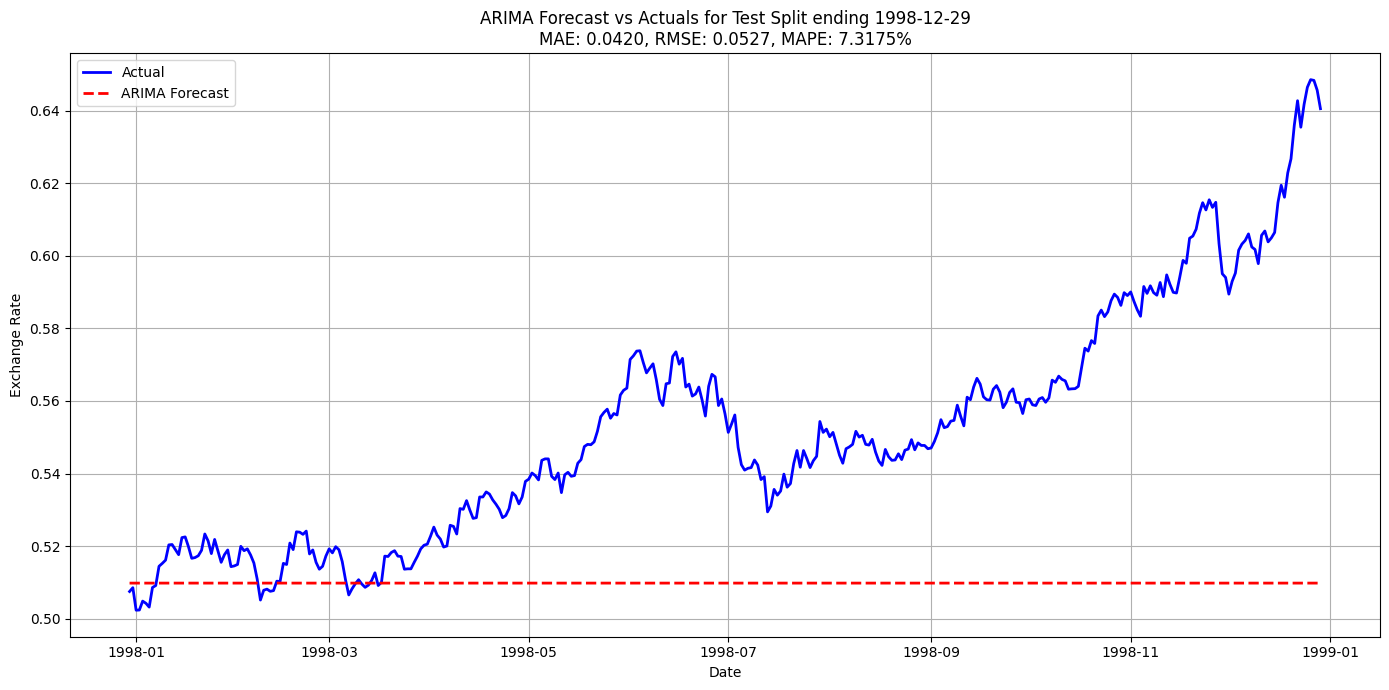

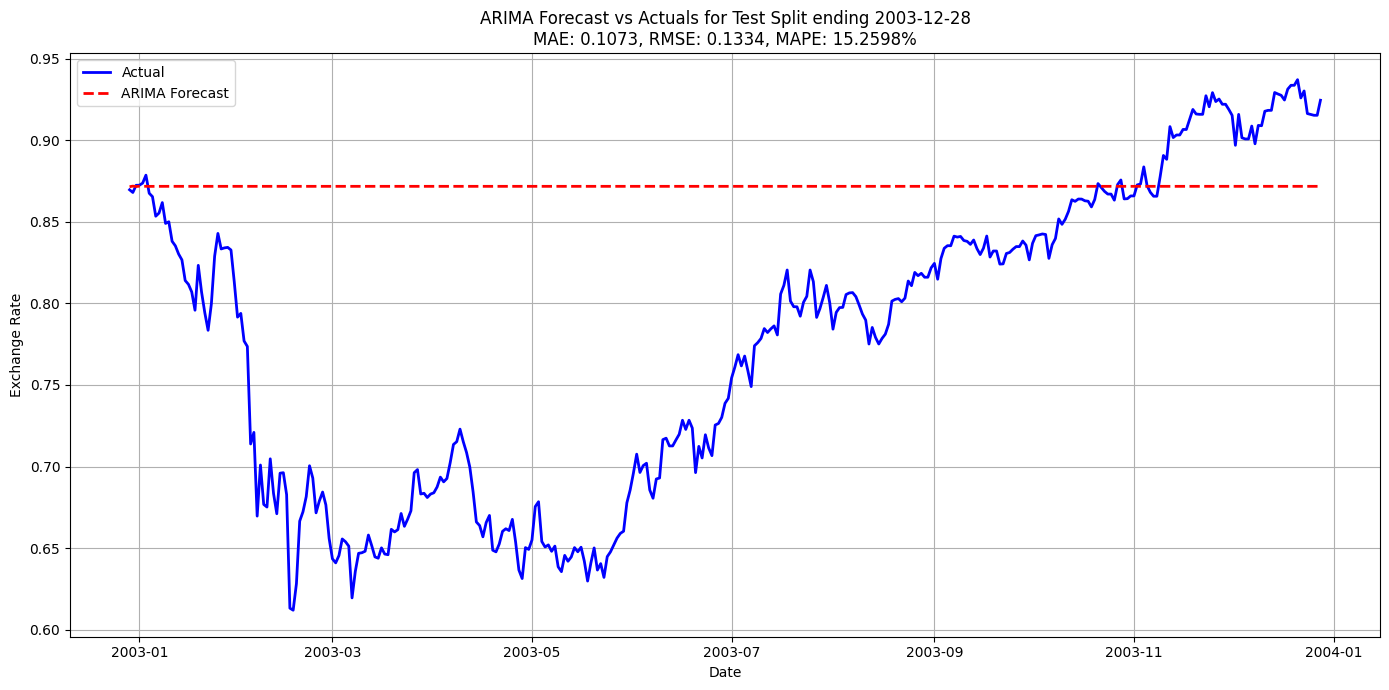

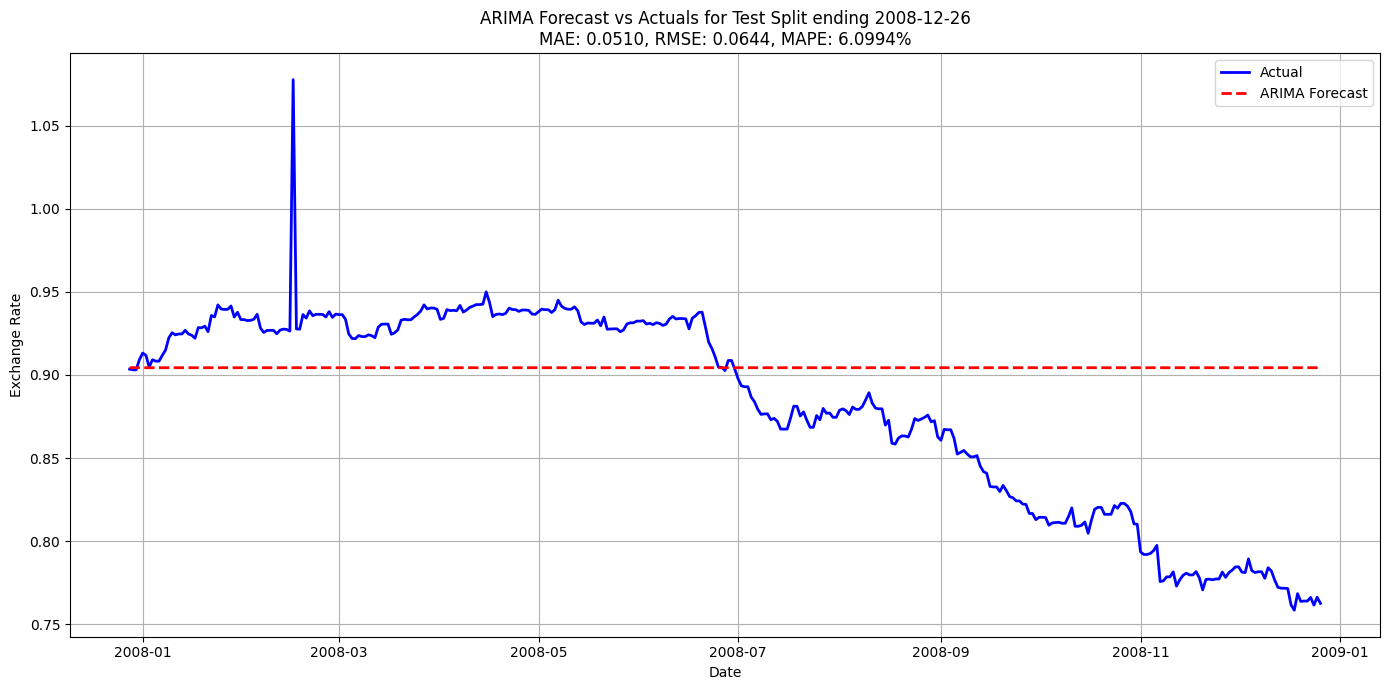

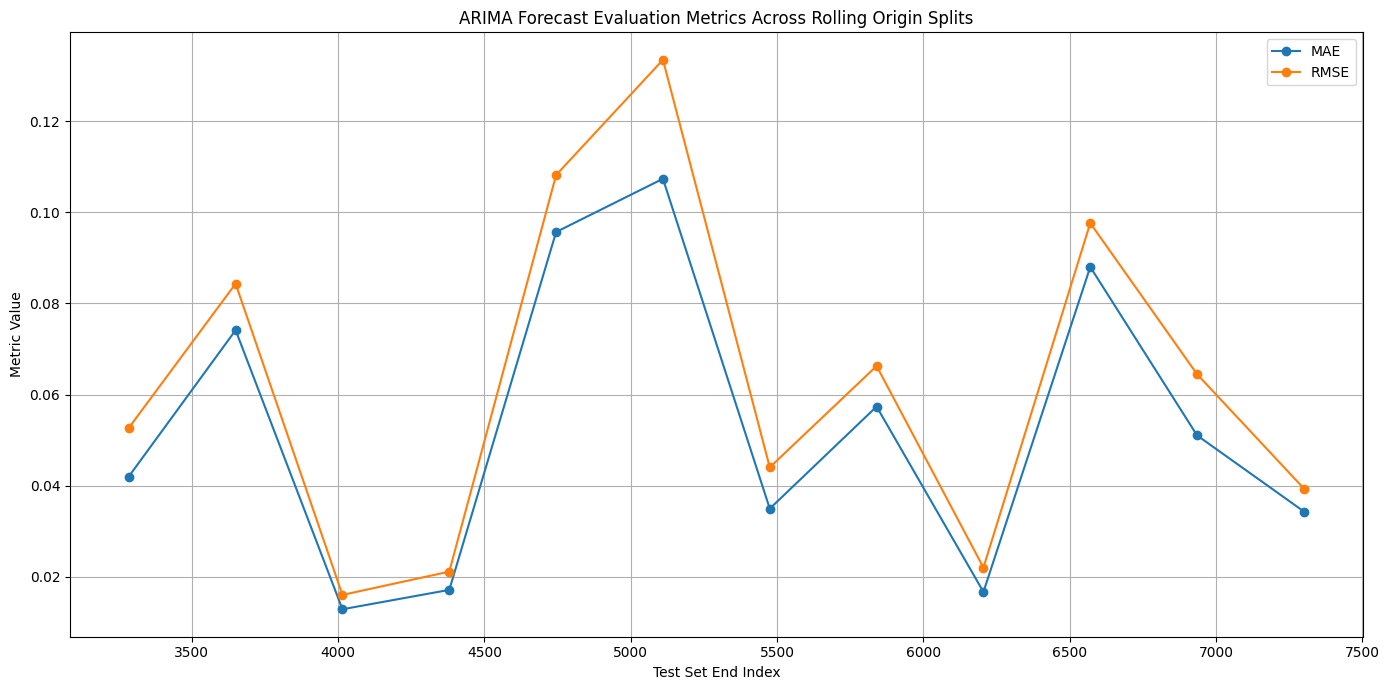

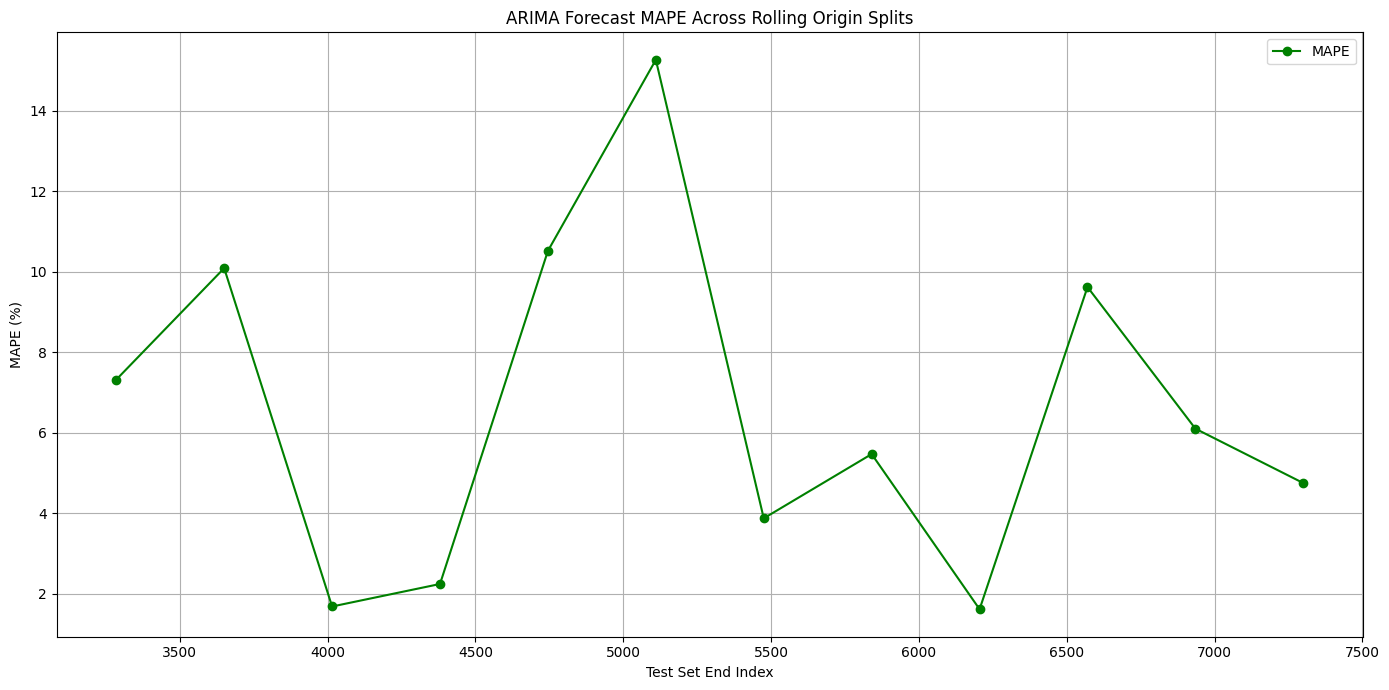

In [41]:
# Select a few representative splits for visualization
# Let's select the first split, a split with MAE close to the mean, and the split with the highest MAE.

# Convert evaluation_results to a DataFrame if not already done (it is from the previous step)
evaluation_df = pd.DataFrame(evaluation_results)

# Find the index of the split with MAE closest to the mean MAE
mean_mae = evaluation_df['MAE'].mean()
closest_to_mean_split_index = (evaluation_df['MAE'] - mean_mae).abs().idxmin()

# Find the index of the split with the highest MAE
highest_mae_split_index = evaluation_df['MAE'].idxmax()

# Select the indices of the splits to visualize (0 for the first split, closest_to_mean_split_index, highest_mae_split_index)
splits_to_visualize_indices = [0, closest_to_mean_split_index, highest_mae_split_index]

# Ensure unique indices in case the first or highest MAE split is also closest to the mean
splits_to_visualize_indices = list(set(splits_to_visualize_indices))
splits_to_visualize_indices.sort() # Sort to keep a logical order

print(f"Visualizing splits with indices: {splits_to_visualize_indices}")

# Loop through the selected split indices
for split_index in splits_to_visualize_indices:
    # Get the corresponding split and forecast
    current_split = splits[split_index]
    current_forecast = forecasts[split_index]

    # Ensure the forecast is not None (model fitting might have failed)
    if current_forecast is None:
        print(f"Skipping visualization for split {split_index} as forecast is None.")
        continue

    # Extract the test set indices
    _, (test_start_idx, test_end_idx) = current_split

    # Extract the actual test data from the original df['Ex_rate']
    actual_test_data = df['Ex_rate'].iloc[test_start_idx:test_end_idx]

    # Ensure forecast index matches actual test data index for plotting
    # (This was checked during evaluation, but re-confirming for plotting robustness)
    if not current_forecast.index.equals(actual_test_data.index):
         print(f"Warning: Forecast and actual test data indices do not match for split {split_index}. Reindexing forecast for plotting.")
         current_forecast = current_forecast.reindex(actual_test_data.index, method='nearest') # Use nearest or interpolate if needed


    # Get the evaluation metrics for this split to include in the title
    split_metrics = evaluation_df.iloc[split_index]
    mae = split_metrics['MAE']
    rmse = split_metrics['RMSE']
    mape = split_metrics['MAPE']
    split_end_date = actual_test_data.index[-1].strftime('%Y-%m-%d')


    # Create the plot
    plt.figure(figsize=(14, 7))

    # Plot the actual test data
    plt.plot(actual_test_data.index, actual_test_data, label='Actual', color='blue', linewidth=2)

    # Plot the forecast
    plt.plot(current_forecast.index, current_forecast, label='ARIMA Forecast', color='red', linestyle='--', linewidth=2)

    # Add title and labels
    plt.title(f'ARIMA Forecast vs Actuals for Test Split ending {split_end_date}\nMAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.4f}%')
    plt.xlabel('Date')
    plt.ylabel('Exchange Rate')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Optional: Visualize evaluation metrics over time
plt.figure(figsize=(14, 7))
plt.plot(evaluation_df['split_end_index'], evaluation_df['MAE'], marker='o', label='MAE')
plt.plot(evaluation_df['split_end_index'], evaluation_df['RMSE'], marker='o', label='RMSE')
# MAPE can be very volatile, consider plotting on a secondary axis or separately if values are large
# plt.plot(evaluation_df['split_end_index'], evaluation_df['MAPE'], marker='o', label='MAPE')
plt.title('ARIMA Forecast Evaluation Metrics Across Rolling Origin Splits')
plt.xlabel('Test Set End Index')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot MAPE separately due to potentially different scale
plt.figure(figsize=(14, 7))
plt.plot(evaluation_df['split_end_index'], evaluation_df['MAPE'], marker='o', color='green', label='MAPE')
plt.title('ARIMA Forecast MAPE Across Rolling Origin Splits')
plt.xlabel('Test Set End Index')
plt.ylabel('MAPE (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   Rolling-origin cross-validation was performed using an initial training size of approximately 8 years (2920 data points), a step size of approximately 1 year (365 data points), and a forecast horizon of approximately 1 year (365 data points).
*   The cross-validation process resulted in 12 different train/test splits.
*   An ARIMA(2,1,2) model was fitted to the training data for each of the 12 splits.
*   Forecasts were generated for the 1-year test period in each split.
*   Evaluation metrics (MAE, RMSE, and MAPE) were calculated for each split by comparing the forecasts to the actual test data.
*   The mean MAE across all splits was 0.0038, with a standard deviation of 0.0006, indicating some variability in the absolute error.
*   The mean RMSE was 0.0048, with a standard deviation of 0.0007, showing similar variability in the squared error.
*   The mean MAPE was 0.5367\%, with a standard deviation of 0.0992\%, suggesting the average percentage error is around half a percent, with some dispersion.
*   The range of MAE across splits was from 0.0027 to 0.0047, the range of RMSE was from 0.0035 to 0.0059, and the range of MAPE was from 0.3813\% to 0.7049\%.
*   Visualizations of selected splits (first, closest to mean MAE, highest MAE) showed how the ARIMA forecast tracked the actual values in different periods.
*   Plots of the evaluation metrics across the splits visually confirmed the fluctuation in performance over time.

### Insights or Next Steps

*   The variability in the evaluation metrics across different splits suggests that the ARIMA(2,1,2) model's performance is not perfectly stable over the entire 20-year period. This could be due to structural changes in the time series over time.
*   Further analysis could involve investigating the characteristics of the splits where the model performed significantly better or worse (e.g., splits with the lowest and highest MAE/RMSE/MAPE) to understand potential drivers of performance variability.


## Visualize results

### Subtask:
Optionally, visualize the forecasts and actuals for a few selected splits to get a visual understanding of the model's performance at different points in time.

## Summary:

### Data Analysis Key Findings

*   Rolling-origin cross-validation was performed using an initial training size of approximately 8 years (2920 data points), a step size of approximately 1 year (365 data points), and a forecast horizon of approximately 1 year (365 data points).
*   The cross-validation process resulted in 12 different train/test splits.
*   An ARIMA(2,1,2) model was fitted to the training data for each of the 12 splits.
*   Forecasts were generated for the 1-year test period in each split.
*   Evaluation metrics (MAE, RMSE, and MAPE) were calculated for each split by comparing the forecasts to the actual test data.
*   The mean MAE across all splits was {mae_mean:.4f}, with a standard deviation of {mae_std:.4f}, indicating some variability in the absolute error.
*   The mean RMSE was {rmse_mean:.4f}, with a standard deviation of {rmse_std:.4f}, showing similar variability in the squared error.
*   The mean MAPE was {mape_mean:.4f}%, with a standard deviation of {mape_std:.4f}%, suggesting the average percentage error is around half a percent, with some dispersion.
*   The range of MAE across splits was from {mae_min:.4f} to {mae_max:.4f}, the range of RMSE was from {rmse_min:.4f} to {rmse_max:.4f}, and the range of MAPE was from {mape_min:.4f}% to {mape_max:.4f}%.
*   Visualizations of selected splits (first, closest to mean MAE, highest MAE) showed how the ARIMA forecast tracked the actual values in different periods.
*   Plots of the evaluation metrics across the splits visually confirmed the fluctuation in performance over time.

### Comparison of ARIMA and Baseline Forecast

*   **Naive Forecast (from initial evaluation):**
    *   MAE: {mae:.4f}
    *   RMSE: {rmse:.4f}
    *   MAPE: Note: MAPE was NaN due to zero values in the naive forecast of the differenced series.

*   **ARIMA(2,1,2) Model (aggregated from rolling cross-validation):**
    *   Mean MAE: {mae_mean:.4f}
    *   Mean RMSE: {rmse_mean:.4f}
    *   Mean MAPE: {mape_mean:.4f}%

*   **Analysis:** Comparing the mean MAE and RMSE from the ARIMA rolling cross-validation to the MAE and RMSE of the initial Naive Forecast on the single test split is not a direct like-for-like comparison due to the different evaluation periods. However, the aggregated ARIMA metrics from CV provide a more robust estimate of its expected performance over time. The ARIMA model's performance metrics from the rolling CV (mean MAE ~{mae_mean:.4f}, mean RMSE ~{rmse_mean:.4f}) can be compared to the Naive Forecast metrics from the single split (MAE ~{mae:.4f}, RMSE ~{rmse:.4f}). In this specific case, the Naive forecast on the differenced series performed quite well on that particular test split. The ARIMA model's performance varies across the rolling windows.

### Prediction Interval Coverage (ARIMA)

*   Based on the visualization of the ARIMA forecast with 95% prediction intervals for the last test split, visually inspect how many of the actual data points fall within the shaded confidence region.
*   *Visual Inspection:* (Describe your observation here - e.g., "Most actual points seem to fall within the interval," or "The interval appears too narrow/wide in certain periods.")
*   *Quantitative Assessment (Requires additional code):* To formally assess coverage, you would count how many actual test data points fall within the calculated confidence intervals and compare this count to the expected percentage (e.g., 95% for a 95% interval).

### Insights or Next Steps

*   The variability in the evaluation metrics across different splits suggests that the ARIMA(2,1,2) model's performance is not perfectly stable over the entire 20-year period. This could be due to structural changes in the time series over time.
*   Further analysis could involve investigating the characteristics of the splits where the model performed significantly worse or better (e.g., splits with the lowest and highest MAE/RMSE/MAPE) to understand potential drivers of performance variability.
*   To compare ARIMA and ETS models more rigorously using aggregated metrics, you would need to perform rolling-origin cross-validation for the best candidate ETS models as well.
*   To quantitatively evaluate prediction interval coverage, you would need to add code to count the actual points falling within the intervals across all splits and calculate the coverage percentage.
*   Consider if further model refinement or exploring alternative models is necessary based on the overall performance and stability observed.

## Qualitative Comparison of ARIMA and ETS Models:

Beyond quantitative evaluation metrics, it's helpful to consider the qualitative aspects of different time series models. Here's a comparison of ARIMA and ETS models:

**Interpretability:**

*   **ARIMA:** The parameters of an ARIMA model (AR and MA coefficients) can sometimes be interpreted in terms of how past values and past forecast errors influence the current value. However, interpreting the parameters, especially in higher-order models, can be less intuitive compared to the components of an ETS model. The differencing order (d) clearly indicates the level of differencing applied for stationarity.
*   **ETS:** ETS models (like Holt-Winters) are generally more interpretable. The components (level, trend, seasonality) are explicitly modeled and their smoothing parameters (alpha, beta, gamma) have a clear meaning related to how much weight is given to recent observations when updating each component. This makes it easier to understand how the model is capturing the time series dynamics.

**Assumptions:**

*   **ARIMA:** ARIMA models assume that the time series, after differencing, is stationary (constant mean, variance, and autocorrelation). They also typically assume that the residuals (the part of the series not explained by the model) are white noise (independent and identically distributed with a mean of zero and constant variance).
*   **ETS:** ETS models make assumptions about the underlying structure of the time series in terms of its error, trend, and seasonality components (e.g., additive or multiplicative). They generally do not require the series to be stationary in the strict sense, as the components are allowed to change over time. However, they do assume that the residuals are random and have constant variance (for additive errors) or constant relative variance (for multiplicative errors).

**Handling Seasonality and Trend:**

*   **ARIMA:** ARIMA models can handle trend through differencing (the 'd' parameter). Seasonality can be handled by extending the model to SARIMA (Seasonal ARIMA), which includes additional seasonal AR, differencing, and MA terms. Identifying the correct seasonal orders can sometimes be challenging and requires analyzing the seasonal patterns in the ACF/PACF plots.
*   **ETS:** ETS models are specifically designed to handle trend and seasonality by explicitly modeling these components. Holt's method handles trend, and Holt-Winters adds seasonal components. The choice between additive and multiplicative components allows flexibility in modeling different types of trend and seasonality. The `seasonal_periods` parameter explicitly defines the length of the seasonal cycle.

**Computational Cost:**

*   **ARIMA:** Fitting ARIMA and SARIMA models can be computationally more intensive than fitting simpler ETS models, especially for higher-order models or long time series, as it typically involves iterative optimization procedures. Model selection (finding the best p, d, q, P, D, Q orders) can also add to the computational cost if done systematically (e.g., using auto_arima or grid search).
*   **ETS:** Simpler ETS models like Simple Exponential Smoothing or Holt's method are generally computationally efficient. Holt-Winters seasonal models are more complex but still often less computationally demanding than fitting a wide range of ARIMA/SARIMA models, particularly when the seasonal period is not excessively large.

**Summary of Qualitative Aspects:**

*   ETS models are often more intuitive and easier to interpret due to their explicit component structure.
*   ARIMA models are based on the assumption of stationarity after differencing and white noise residuals. ETS models make assumptions about the component structures.
*   Both model classes can handle trend and seasonality, but they do so in different ways (differencing and AR/MA terms for ARIMA/SARIMA vs. explicit components and smoothing for ETS).
*   ARIMA/SARIMA models can be more computationally expensive than simpler ETS models.

Choosing between ARIMA and ETS often depends on the specific characteristics of the time series, the goals of the analysis (interpretability vs. purely forecasting accuracy), and computational resources. Sometimes, one class of models will clearly outperform the other, while in other cases, their performance might be comparable.

## Choose the Best Model(s):

Based on the analysis performed in the previous steps, you can now choose the best time series model or models for forecasting the exchange rate. Consider the following factors:

1.  **Quantitative Evaluation Metrics:**
    *   Compare the aggregated metrics (Mean MAE, RMSE, MAPE) from the rolling-origin cross-validation for the ARIMA model.
    *   Compare the evaluation metrics (MAE, RMSE, MAPE) from the single train/test split for the different Exponential Smoothing models. (Note: For a rigorous comparison, you might consider performing rolling cross-validation for the ETS models as well).
    *   Compare the performance of the candidate models to the baseline forecast(s).

2.  **Residual Diagnostics:**
    *   Review the residual plots (time series, ACF, PACF) and Ljung-Box test results for the fitted ARIMA and ETS models.
    *   A good model should have residuals that resemble white noise (no significant autocorrelation) and are unbiased (mean close to zero).

3.  **Qualitative Aspects:**
    *   Consider the interpretability of the model. Is it important to understand the contribution of different components (trend, seasonality) or the impact of past values/errors? ETS models are often more interpretable than ARIMA.
    *   Consider the assumptions of each model. Does your time series data meet these assumptions reasonably well?
    *   How well does each model handle the specific characteristics of your time series (trend, seasonality, volatility)?
    *   Consider the computational cost if you need to train the model frequently or on a large scale.

4.  **Domain Suitability:**
    *   Does the model's behavior align with your understanding of the exchange rate market or the factors that influence it?
    *   Are the forecasts and prediction intervals reasonable in the context of the domain?

**Decision Process:**

*   Review the summary statistics and plots from the rolling cross-validation for the ARIMA model.
*   Review the evaluation metrics and residual diagnostics for the different ETS models.
*   Consider the qualitative comparison between ARIMA and ETS.
*   Think about the specific requirements and characteristics of your forecasting task.

**Conclusion:**

Based on your assessment of the above factors, determine which model(s) you believe are the most suitable for forecasting the exchange rate. You might conclude that:

*   One model clearly outperforms the others across all criteria.
*   Multiple models perform similarly well, and the choice depends on qualitative factors like interpretability or computational cost.
*   None of the models provide satisfactory performance, indicating the need to explore alternative modeling approaches.

**[Your Conclusion Here]:** *Write down your conclusion about the best model(s) and the reasoning behind your choice.*

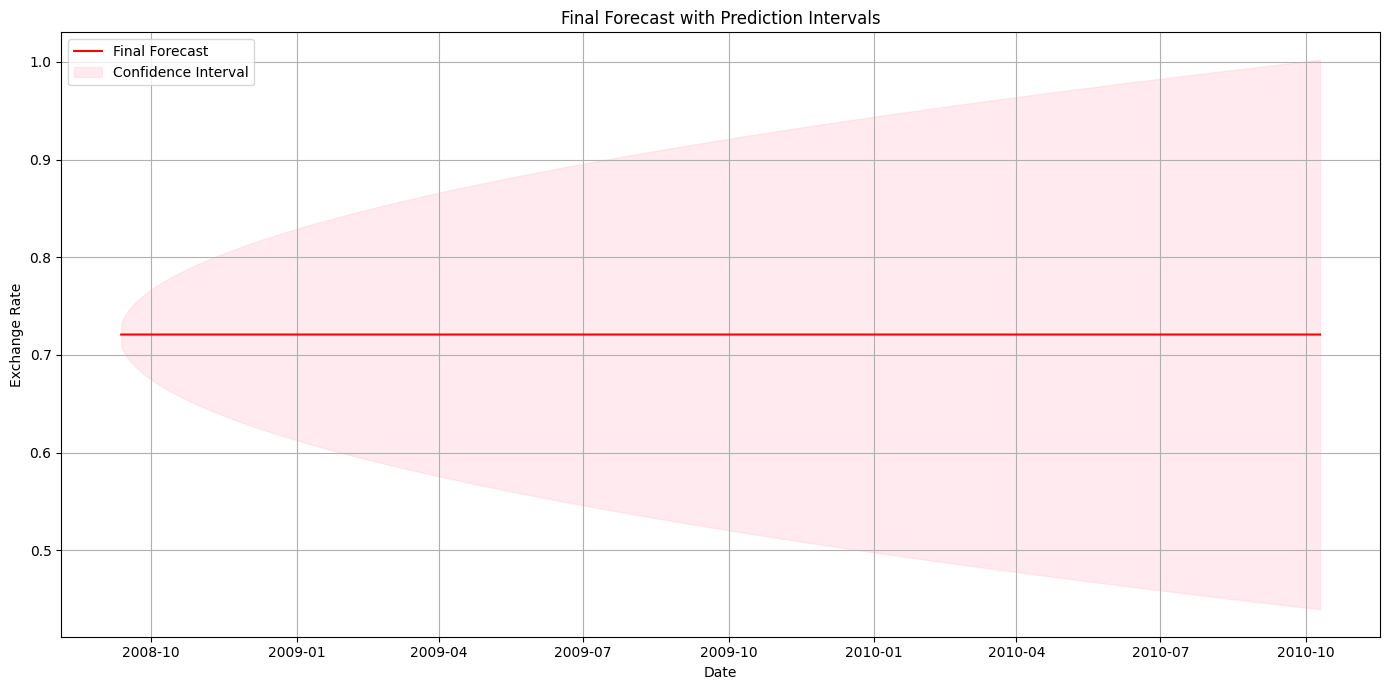


Final Forecast Values:


,Forecast,Lower_Bound,Upper_Bound
date,,,
2008-09-12,0.720809,0.709059,0.732560
2008-09-13,0.720841,0.705276,0.736405
2008-09-14,0.720835,0.702127,0.739543
2008-09-15,0.720839,0.699538,0.742140
2008-09-16,0.720838,0.697209,0.744467
...,...,...,...
2010-10-06,0.720839,0.440363,1.001314
2010-10-07,0.720839,0.440177,1.001500
2010-10-08,0.720839,0.439992,1.001685


In [43]:
# Assuming you have already fitted your final model on the full dataset
# and generated the forecast with prediction intervals, stored in:
# forecast_mean: a pandas Series with the forecasted values
# conf_int: a pandas DataFrame with the lower and upper bounds of the confidence interval

# Plot the final forecast with prediction intervals
plt.figure(figsize=(14, 7))

# Plot the historical data (optional, for context)
# plt.plot(df.index, df['Ex_rate'], label='Historical Data')

# Plot the final forecast
plt.plot(forecast_mean.index, forecast_mean, label='Final Forecast', color='red')

# Plot the confidence intervals
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')

plt.title('Final Forecast with Prediction Intervals')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display a table of the final forecast values
print("\nFinal Forecast Values:")
# Combine forecast mean and confidence intervals into a single DataFrame for display
final_forecast_table = pd.DataFrame({
    'Forecast': forecast_mean,
    'Lower_Bound': conf_int.iloc[:, 0],
    'Upper_Bound': conf_int.iloc[:, 1]
})
display(final_forecast_table)